# ONLINE GAME STORE MARKETING ANALYSIS

This project evaluates data from the online retailer called, Ice. They sell video games, globally. On their website, customers will find user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources to help them make buying decisions.

In this analysis, we will identify patterns that contribute to whether a game succeeds or not. This will allow Ice to spot potential big winners and plan advertising campaigns for the next year.

### Data Description
    — Name 
    — Platform 
    — Year_of_Release 
    — Genre 
    — NA_sales (North American sales in USD million) 
    — EU_sales (sales in Europe in USD million) 
    — JP_sales (sales in Japan in USD million) 
    — Other_sales (sales in other countries in USD million) 
    — Critic_Score (maximum of 100) 
    — User_Score (maximum of 10) 
    — Rating (ESRB)

Data for 2016 may be incomplete.

__________

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Create file path
games_path = "/Users/sabrinamcfield/Data_Science_Projects-TripleTen-/project3_marketing_analysis/games.csv"

# Load datasets
df = pd.read_csv(games_path)

In [3]:
df.shape

(16715, 11)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# DATA PREPROCESSING

### Check Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's lowercase all the columns and the data for continuity and ease in working with the data.

In [6]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x) #lowercase all data values
df.columns = df.columns.str.lower()  #lowercase columns

/var/folders/rl/4f5pmhb97r921h_zb82l97q80000gn/T/ipykernel_12640/2234527987.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x) #lowercase all data values


Im going to change the year_of_release values to an integer. Im not going to convert to datetimeIndex because it doesnt not represent a month-day-year. I tried to turn the user_score column into a float and found that their is a tbd value. These are more than likely games that have not been rated because they are new and the data was pulled prior to it being scored by users. Ill go ahead and remove tbd user_scores.

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
df = df[df['user_score'] != 'tbd'] #remove tbd user score so it doesn't interfer with calculations later
df['user_score'] = df['user_score'].astype(float) #change user_score column to float.

In [9]:
df['year_of_release'] = df['year_of_release'].astype('Int64') #change year_of_release column to integer.

In [10]:
df.dtypes #check the change

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

__________

## Replace NAs

In [11]:
df.isna().sum() #check for NAs

name                  2
platform              0
year_of_release     221
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7236
user_score         6701
rating             6716
dtype: int64

The name and genre of the product are two of the most important factors to evaluate a game's performance. Since there are only two columns missing with this information we'll drop them from the dataset.

In [12]:
df = df.dropna(subset=['name', 'genre', 'year_of_release']) #drop the NAs in the name, genre, year_of_release column

In [13]:
df.isna().sum() #check results

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7141
user_score         6605
rating             6626
dtype: int64

I decided to remove rows where there are missing values in all of the four rows; year_of_release, critic_score, user_score and rating. Since it is only 85 rows out of 16,715, it won't impact our results significantly especially since the key information in identifying trends is missing in those columns.

I also dropped rows where the year of release is missing. This is a a very important indicator into the historical performance. If this information is not available, we shouldn't analyze the 184 rows that are not there.

**Updated Assumptions as to why data is missing**

Its my assumption that values are missing from user_score because of the emergence of the internet bringing the ability for users to write reviews. 

Ratings began in 1994 after the ESRB was organized in response to violent and mature content in games.

As technology improved and more games began releasing, gaming culture grew and as a result so did the critiques.
__________

## Check for duplicates

In [14]:
duplicate = df[df.duplicated()]  #check for duplicates
duplicate

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
df_dup = df.duplicated(subset=['name', 'platform', 'year_of_release']).sum() #check for selected duplicates
df_dup

1

In [16]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release']) #drop that duplicate

In [17]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum() #check that the change applied

0

In [18]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


__________

## New Columns

In [19]:
df['total_sales'] = df[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1) #create new total_sales column by adding na, eu, jp and other sales columns together

In [20]:
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


I created a new column with total sales (the sum of sales in all regions) for each game. This will be used to evaluate global performance.

In [21]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7141
user_score         6605
rating             6626
total_sales           0
dtype: int64

So far, I cleaned up the data for easier navigation including lowercasing everything and getting rid of whitespace. I notice we are working with a large amount of games across a wide timeframe, which speaks to missing data in the critic, user score and rating columns.  There have been many technological advances over the nearly 30 year time frame the data covers. Considering this, the emergence of the internet's ability to connect people and give feedback on products is essential to the missing data.  In addition, the rate in which games have been developed because of advancements has also had consumers questioning the type of content being released inspiring the ESRB to form.

It seems it will be necessary to narrow down the data to more recent years in order to get an accurate assestment of what 2017 will bring. Since some of these platforms are discontinued, it won't be necessary to include them in our analysis.  I can already tell that North America outpaces other countries in sales, so it appears this region will determine global success of a game and platform.

__________
## EDA

In [22]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,14067.0,14067.000000,14067.000000,14067.000000,14067.000000,6926.000000,7462.000000,14067.000000
mean,2006.323026,0.287420,0.163212,0.091280,0.052949,70.246896,7.126548,0.594861
std,6.174141,0.879695,0.544026,0.334498,0.202135,13.868812,1.499429,1.673948
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,62.000000,6.400000,0.060000
50%,2007.0,0.080000,0.030000,0.000000,0.010000,72.000000,7.500000,0.190000
75%,2011.0,0.260000,0.130000,0.050000,0.040000,80.000000,8.200000,0.540000
max,2016.0,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [23]:
# Pull rows with 0 values all of the sales columns
df.loc[(df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] == 0.00).all(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,g1 jockey 4 2008,ps3,2008,sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,score international baja 1000: the official game,ps2,2008,racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


Ill keep the two rows with 0.00 sales in all four sales columns and missing values in the score and rating columns because this may give insight into performance trends.

__________

#### Let's take a look at how many games were released in different years and evaluate which period is most significant.

In [24]:
released_df = df.groupby('year_of_release')['name'].count() #group data to see how many games were released each year

released_df

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     288
1998     379
1999     330
2000     307
2001     400
2002     637
2003     680
2004     655
2005     818
2006     882
2007    1005
2008    1101
2009    1021
2010     924
2011     919
2012     628
2013     529
2014     560
2015     568
2016     468
Name: name, dtype: int64

Data from 1980-1999 may not be as significant because businesses didn't begin to have official websites until about 1991 and social media wasn't a tool for marketing until the 2000s.  This would impact the abilty for users to rate the games upon year_of_release impacting the sales. By now, many games and consoles have been discontinued. **It would be best to consider the data within a four year span from 2012-2016, as a relevant guage for making marketing plans for 2017 because games released in this timeframe are more equivalent in regards to technology.**

__________

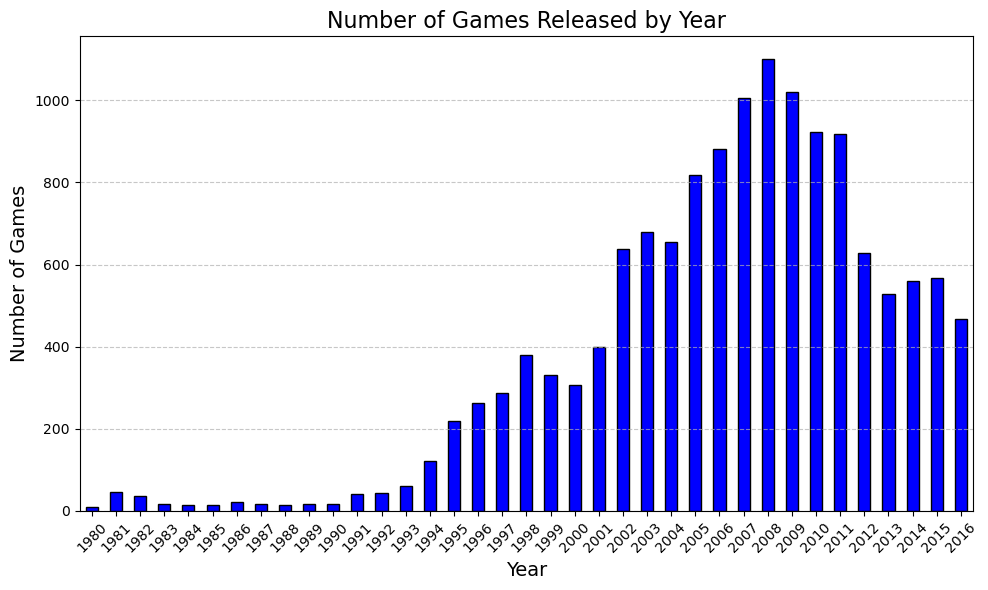

In [25]:
plt.figure(figsize=(10, 6))  # Plot the games released by the year
released_df.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Games Released by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()  # Show the plot

#### Let's look at how sales varies from platform to platform. 

In [26]:
sales_per_year_platform = df[['year_of_release','platform','total_sales']].sort_values(by='total_sales', ascending=False) #total sales by platform per year in descending order based off sales

sales_per_year_platform.head(15)

,year_of_release,platform,total_sales
0,2006,wii,82.54
1,1985,nes,40.24
2,2008,wii,35.52
3,2009,wii,32.77
4,1996,gb,31.38
5,1989,gb,30.26
6,2006,ds,29.80
7,2006,wii,28.91
8,2009,wii,28.32
9,1984,nes,28.31


__________

#### Now I'll find the top 5 platforms with the greatest total sales and build a distribution based on data for each year. Ill look for platforms that used to be popular but now have zero sales. Ill also seek to understand the life cycle of a platform including how long it generally takes for new platforms to appear and old ones to fade.

In [27]:
sales_per_platform = df.groupby('platform')['total_sales'].sum() # Aggregate total sales by platform

top_5_platforms = sales_per_platform.nlargest(5)  # Sort the platforms by total sales in descending order and get the top 10

top_5_platforms

platform
ps2     1171.19
x360     948.74
ps3      921.08
wii      791.91
ps       714.26
Name: total_sales, dtype: float64

In [28]:
top_platforms = ['ps2', 'x360', 'ps3','wii','ds'] # Selected platforms

df_top_platforms = df[df['platform'].isin(top_platforms)] # Filter data for selected platforms

df_top_5 = df_top_platforms[['platform', 'year_of_release', 'total_sales']]  # create a dataframe with the 'platform','year' and 'sales' columns

df_top_5['platform'].unique() #check the dataframe includes only the top 5

array(['wii', 'ds', 'x360', 'ps3', 'ps2'], dtype=object)

In [29]:
# Pivot the DataFrame to include top 5 and year_of_release
df_pivoted = df_top_5.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_pivoted

platform,ds,ps2,ps3,wii,x360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,34.91,NaN,NaN,NaN
2001,NaN,159.77,NaN,NaN,NaN
2002,NaN,198.07,NaN,NaN,NaN
2003,NaN,180.71,NaN,NaN,NaN
2004,17.23,209.10,NaN,NaN,NaN
2005,128.68,154.96,NaN,NaN,8.25
2006,114.93,100.49,20.46,136.07,51.55
2007,121.23,66.39,72.99,149.08,94.37


In [30]:
df_reset = df_pivoted.reset_index() #reset the index
df_reset

platform,year_of_release,ds,ps2,ps3,wii,x360
0,1985,0.02,NaN,NaN,NaN,NaN
1,2000,NaN,34.91,NaN,NaN,NaN
2,2001,NaN,159.77,NaN,NaN,NaN
3,2002,NaN,198.07,NaN,NaN,NaN
4,2003,NaN,180.71,NaN,NaN,NaN
5,2004,17.23,209.10,NaN,NaN,NaN
6,2005,128.68,154.96,NaN,NaN,8.25
7,2006,114.93,100.49,20.46,136.07,51.55
8,2007,121.23,66.39,72.99,149.08,94.37
9,2008,102.44,43.74,117.01,158.56,134.07


In [31]:
df_top_5_sales = df_reset.sort_values(by='year_of_release', ascending=True) # Sort by year
df_top_5_sales

platform,year_of_release,ds,ps2,ps3,wii,x360
0,1985,0.02,NaN,NaN,NaN,NaN
1,2000,NaN,34.91,NaN,NaN,NaN
2,2001,NaN,159.77,NaN,NaN,NaN
3,2002,NaN,198.07,NaN,NaN,NaN
4,2003,NaN,180.71,NaN,NaN,NaN
5,2004,17.23,209.10,NaN,NaN,NaN
6,2005,128.68,154.96,NaN,NaN,8.25
7,2006,114.93,100.49,20.46,136.07,51.55
8,2007,121.23,66.39,72.99,149.08,94.37
9,2008,102.44,43.74,117.01,158.56,134.07


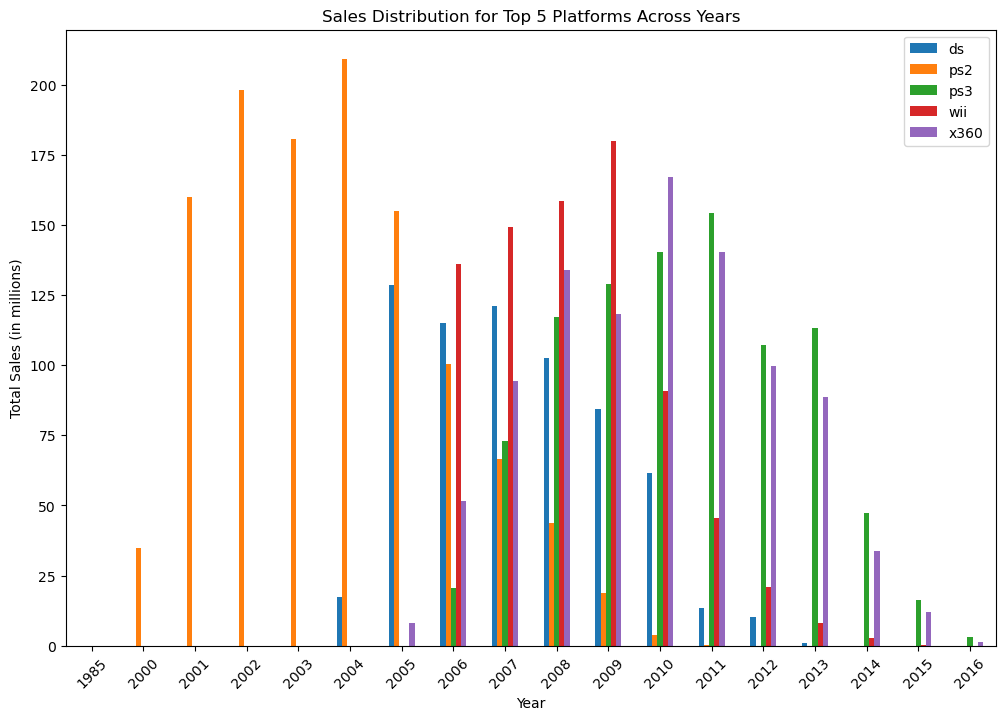

In [32]:
df_top_5_sales.plot(x='year_of_release',   #box plot the top 5 sales distributions among platforms
        y=['ds','ps2','ps3', 'wii','x360'],
        kind='bar',
        legend=True,
        title='Sales Distribution for Top 5 Platforms Across Years',
        xlabel='Year',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(12, 8))

plt.legend(['ds','ps2','ps3', 'wii','x360'])
plt.show()

DS had a 9 year run from 2004-2013 and PS2 had a 11 year run from 2000-2011. Both of these platforms have missing values after those dates because the **platforms were likely discontinued**. 

Of the top 5 selling platorms, only PS3, Wii and X360 had sales in 2016.  These three platforms are each about 10 years old and based off of the historical trends, **new platforms typically go on a 10-11 run** before another platform is developed in released.  We have approached that 10 year cycle and all the sales have been on a steady decline of the last 5 years but Wii has declined the most. This could mean that Wii will be phasing out first. PS3 has the most sales in 2016 and its likely a new PS platform will emerge considering its history of upgrading its devices to newer models.

__________

#### It's best to work with a time period that will allow us to build a model thats relevant for 2017.

In [33]:
df_relevant = df[df['year_of_release'] >= 2012]  # Drop rows where year_of_release is less than 2012
df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


To focus in on our mission to create a plan that supports marketing efforts for 2017, **I decided to drop all rows with a year_of_release less than 2012.** When we consider how quickly the market is changing, 2012-2016 will be a good time frame to work within to give us a better glimpse of what to expect for 2017. 
__________

#### Let's find which platforms are leading in sales, which ones are growing or shrinking and select several potentially profitable platforms to analyze further.

In [34]:
leading_platform = df_relevant.groupby('platform')['total_sales'].sum() # Aggregate total sales by platform

top_10_platforms = leading_platform.nlargest(10)  # Sort the platforms by total sales in descending order and get the top 10

top_10_platforms

platform
ps4     314.00
ps3     287.38
x360    235.00
3ds     192.71
xone    158.77
wiiu     81.79
pc       62.56
psv      48.87
wii      31.95
ds       11.25
Name: total_sales, dtype: float64

In [35]:
selected_top_10_platforms = ['ps4','ps3','x360','3ds','xone','wiiu','pc','psv','wii','ds'] # Selected platforms

df_top_platforms = df_relevant[df_relevant['platform'].isin(selected_top_10_platforms)] # Filter data for selected platforms

df_relevant_10 = df_top_platforms[['platform', 'year_of_release', 'total_sales']]  # create a dataframe with the 'platform','year' and 'sales' columns

df_relevant_10['platform'].unique() #check the dataframe includes only the top 10

array(['ps3', 'x360', 'ps4', '3ds', 'ds', 'xone', 'wiiu', 'wii', 'pc',
       'psv'], dtype=object)

In [36]:
# Pivot the DataFrame to include top 5 and year_of_release
df_pivoted_10 = df_relevant_10.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_pivoted_10

platform,3ds,ds,pc,ps3,ps4,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2012,51.01,10.28,23.22,107.28,NaN,16.19,21.08,17.56,99.57,NaN
2013,56.32,0.97,12.38,113.24,25.99,10.59,8.11,21.65,88.57,18.96
2014,43.07,NaN,13.25,47.40,100.00,11.90,2.61,22.01,33.77,54.07
2015,27.21,NaN,8.49,16.30,118.86,5.95,0.15,16.27,11.87,59.92
2016,15.10,NaN,5.22,3.16,69.15,4.24,NaN,4.30,1.22,25.82


In [37]:
df_reset_10 = df_pivoted_10.reset_index() #reset the index
df_reset_10

platform,year_of_release,3ds,ds,pc,ps3,ps4,psv,wii,wiiu,x360,xone
0,2012,51.01,10.28,23.22,107.28,NaN,16.19,21.08,17.56,99.57,NaN
1,2013,56.32,0.97,12.38,113.24,25.99,10.59,8.11,21.65,88.57,18.96
2,2014,43.07,NaN,13.25,47.40,100.00,11.90,2.61,22.01,33.77,54.07
3,2015,27.21,NaN,8.49,16.30,118.86,5.95,0.15,16.27,11.87,59.92
4,2016,15.10,NaN,5.22,3.16,69.15,4.24,NaN,4.30,1.22,25.82


In [38]:
df_top_10_sales = df_reset_10.sort_values(by='year_of_release', ascending=True) # Sort by year
df_top_10_sales

platform,year_of_release,3ds,ds,pc,ps3,ps4,psv,wii,wiiu,x360,xone
0,2012,51.01,10.28,23.22,107.28,NaN,16.19,21.08,17.56,99.57,NaN
1,2013,56.32,0.97,12.38,113.24,25.99,10.59,8.11,21.65,88.57,18.96
2,2014,43.07,NaN,13.25,47.40,100.00,11.90,2.61,22.01,33.77,54.07
3,2015,27.21,NaN,8.49,16.30,118.86,5.95,0.15,16.27,11.87,59.92
4,2016,15.10,NaN,5.22,3.16,69.15,4.24,NaN,4.30,1.22,25.82


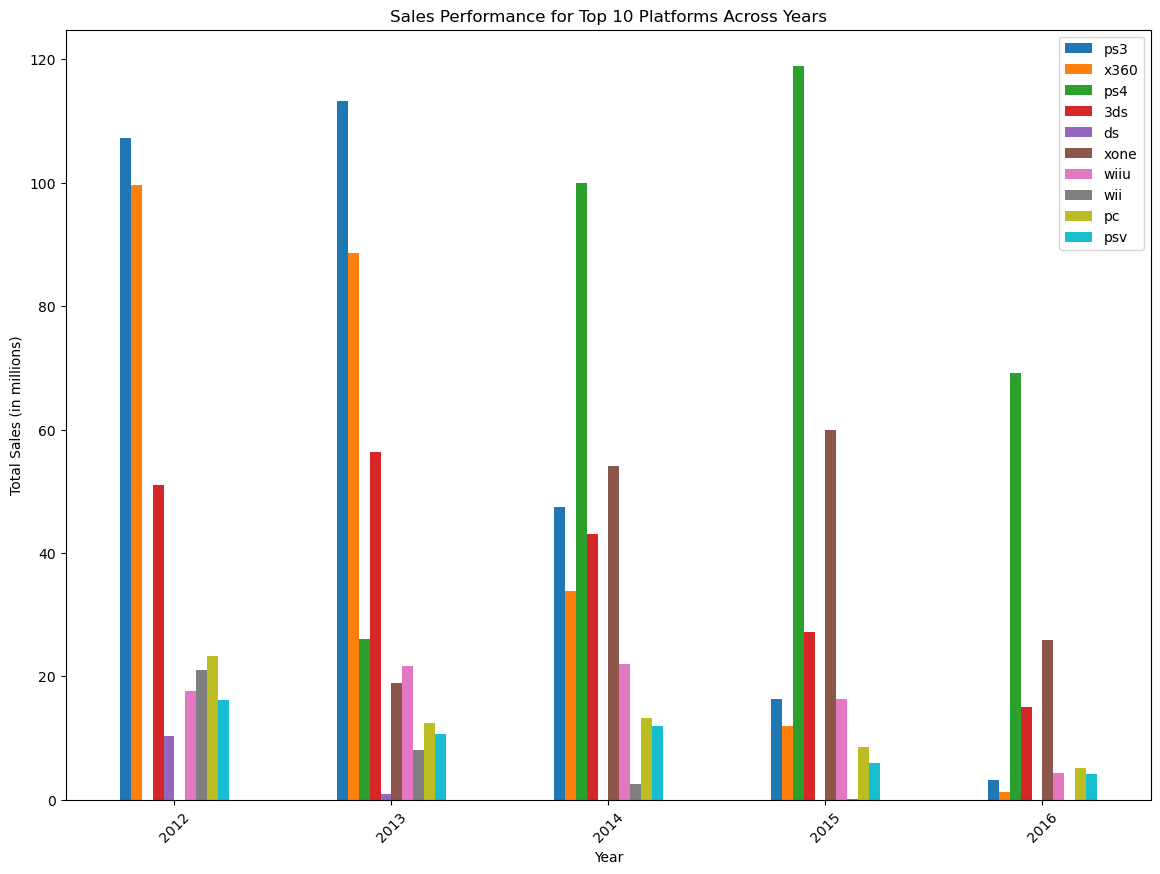

In [39]:
df_top_10_sales.plot(x='year_of_release',   #box plot the top 10 sales performance among platforms from 2006-2016
        y=['ps3', 'x360', 'ps4', '3ds', 'ds', 'xone', 'wiiu', 'wii', 'pc',
       'psv'],
        kind='bar',
        legend=True,
        title='Sales Performance for Top 10 Platforms Across Years',
        xlabel='Year',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.legend(['ps3', 'x360', 'ps4', '3ds', 'ds', 'xone', 'wiiu', 'wii', 'pc',
       'psv'])
plt.show()


**Leading Platforms:**
The PS franchise is has been leading by significant margins event though sales have declined across the board. It will take a few more years for PS3 users to convert but they are loyal and most likely to upgrade to PS4 within the next 3 years.

**Growing or Shrinking Platforms:**
The PC market seems relatively steady but with modest performance. Meanwhile, the 3DS is likely to maintain decent sales for at least four more years before it starts phasing out. The Wii franchise is shrinking in sales. When Xbox and PS had new releases, their sales skyrockedt ahead of the previous platform but Wii's new release underperformed the previous platform, which is a sign that this platform is phasing out.

**Potentially Profitable Platforms:**
It is likely that more consumers will shift towards **upgrading to the PS4**. The Xbox One and 3DS should continue to perform well as they are still within their 10-year product lifecycle.

____________

#### Here I will build a box plot for the global sales of all games, broken down by platform to see if there are significant differences in sales or average sales on the top 10 most relevant platforms.

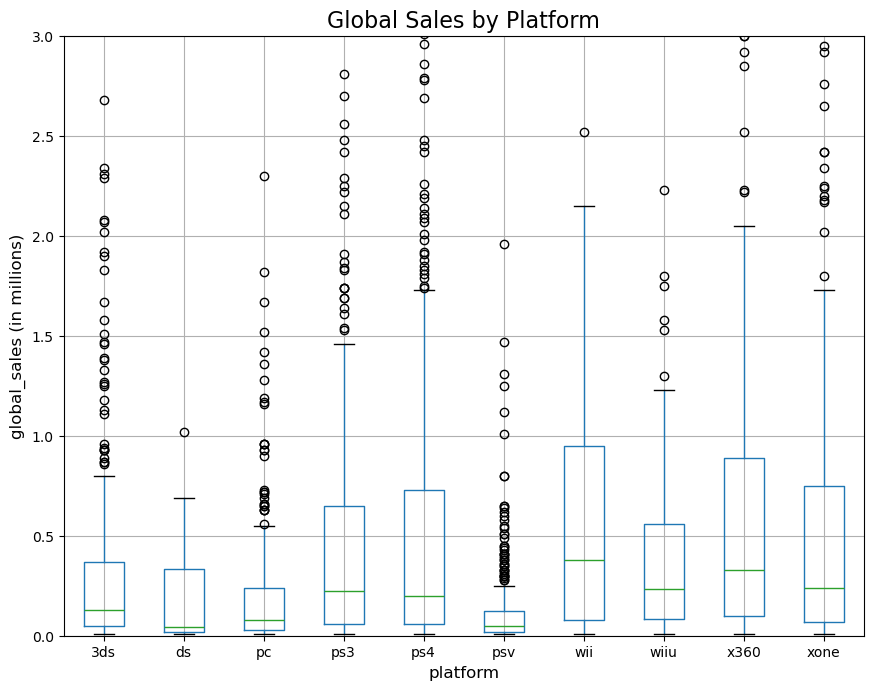

In [40]:
df_relevant_10.boxplot('total_sales', by='platform', figsize=(10, 8))  #create a boxplot based off of the relevant top 10 platform game sales
plt.ylim(0,3)

plt.title('Global Sales by Platform', fontsize=16)
plt.suptitle('')  # Remove default Pandas boxplot title
plt.xlabel('platform', fontsize=12)
plt.ylabel('global_sales (in millions)', fontsize=12)
plt.show()

The difference in sales for PS, Xbox and Wii platforms are **exceedingly different** than the others. PS3, PS4, X360 and Xone have distinguished themselves from the rest. Although the mean is not explicity represented on the boxplot, **the median represents where the most occuring sales numbers lie and once again PS, Xbox and Wii are relatively close** with X360 having the highest median value.  All of the platforms experience significant outliers with the most dramatic being from PS4 and X360 and the least dramatic from DS. These outliers could imply consumers converting from one platorm to another or top franchise game releases that boost sales.

________________

#### Lets analyze how user and critic reviews affect sales for the PS4 platform.  Then, I'll build a scatter plot and calculate the correlation between reviews and sales to draw conclusions. 

In [41]:
ps4_data = df_relevant[df_relevant['platform'] == 'ps4'][['name','critic_score', 'user_score', 'total_sales']]
ps4_data

,name,critic_score,user_score,total_sales
31,call of duty: black ops 3,NaN,NaN,14.63
42,grand theft auto v,97.0,8.3,12.62
77,fifa 16,82.0,4.3,8.58
87,star wars battlefront (2015),NaN,NaN,7.98
92,call of duty: advanced warfare,83.0,5.7,7.66
...,...,...,...,...
16500,root letter,69.0,7.5,0.01
16503,shin hayarigami 2,NaN,NaN,0.01
16526,dungeons 2,61.0,7.9,0.01
16530,carmageddon: max damage,51.0,5.5,0.01


If the game **doesn't have a user or critic score**, we will need to **exclude it from the evaluation of how these reviews affect sales.** Therefore we will drop the rows with missing values in user or critic score column.

In [42]:
ps4_data.shape #check the shape

(386, 4)

In [43]:
ps4_data.isna().sum() #check the missing values

name              0
critic_score    136
user_score      129
total_sales       0
dtype: int64

In [44]:
ps4_data_reviews = ps4_data.dropna() #drop the missing values and assign it to the dataframe

In [45]:
ps4_data_reviews.isna().sum() #check missing values

name            0
critic_score    0
user_score      0
total_sales     0
dtype: int64

**CORRELATION BETWEEN CRITIC SCORE VS TOTAL SALES**

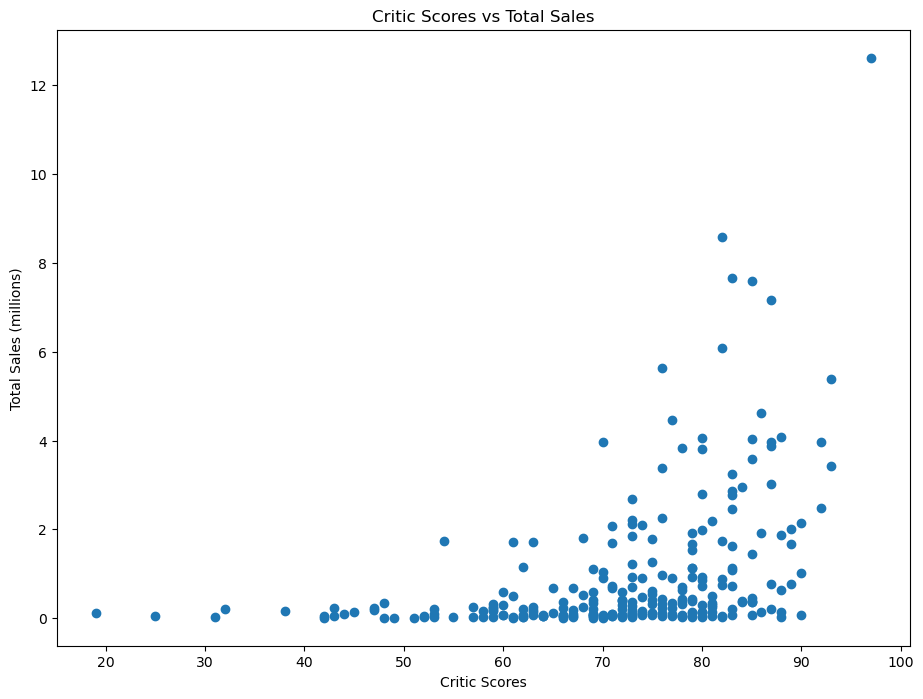

In [46]:
plt.figure(figsize=(11,8))  #create a scatter plot
plt.scatter(x = ps4_data_reviews['critic_score'], y = ps4_data_reviews['total_sales'])
plt.ylabel('Total Sales (millions)')
plt.xlabel('Critic Scores')
plt.title('Critic Scores vs Total Sales')

plt.show()

In [47]:
ps4_data_outlier = ps4_data_reviews.loc[ps4_data_reviews['critic_score'] == max(ps4_data_reviews['critic_score']), :] #find the outlier

In [48]:
ps4_data_outlier

,name,critic_score,user_score,total_sales
42,grand theft auto v,97.0,8.3,12.62


In [49]:
correlation = ps4_data_reviews['critic_score'].corr(ps4_data_reviews['total_sales']) #calculate correleation

print(f'Correlation between critic_score and total_sales: {correlation}')

Correlation between critic_score and total_sales: 0.40589480145836687


Sales of the games on the PS4 platform does notice an increase in sales with critic scores over 55% rating . Games with 70% critic score and up exceeds the average in sales significantly which indicates a slight positive correlation to sales performance and critic score. The outlier with the highest critic score is Grand Theft Auto V but this is likely because of the strong brand franchise and their cross platform representation. **Overall, there is a moderately positive correlation between critic_score and total_sales of the PS4 platform.**

**CORRELATION BETWEEN USER SCORE VS TOTAL SALES**

In [50]:
ps4_data_user = ps4_data_reviews.sort_values(by='user_score') #put the user_score values in numerical order
ps4_data_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 7479 to 303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          249 non-null    object 
 1   critic_score  249 non-null    float64
 2   user_score    249 non-null    float64
 3   total_sales   249 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.7+ KB


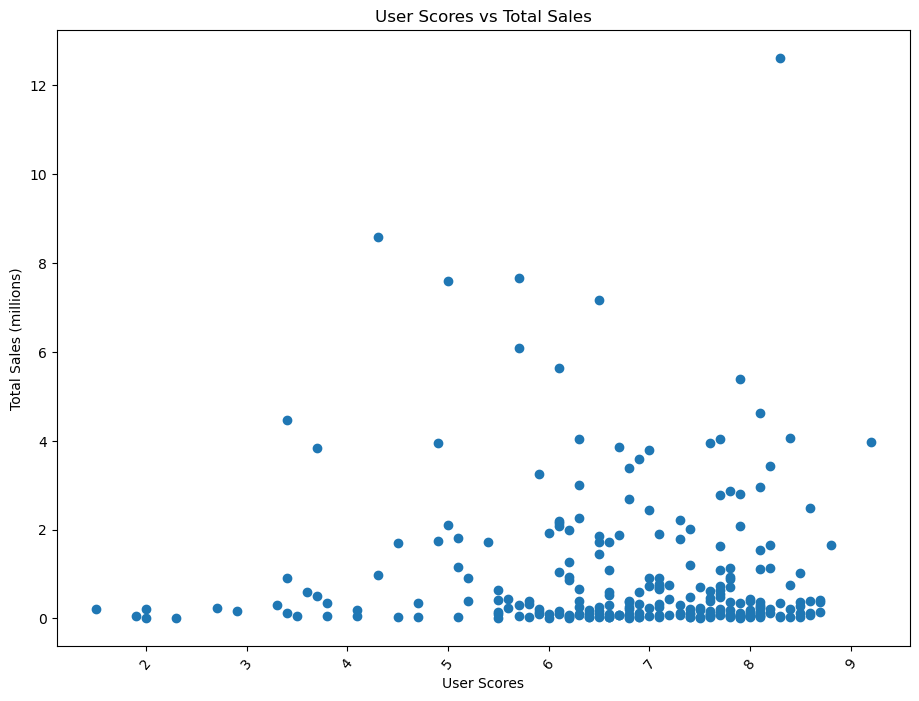

In [51]:
plt.figure(figsize=(11, 8))  #create a scatter plot
plt.scatter(x = ps4_data_reviews['user_score'], y =ps4_data_reviews['total_sales'])
plt.ylabel('Total Sales (millions)')
plt.xlabel('User Scores')
plt.title('User Scores vs Total Sales')
plt.xticks(rotation=50)

plt.show()

In [52]:
ps4_data_reviews.loc[ps4_data_reviews['user_score'] == max(ps4_data_reviews['user_score']), :] #find the outlier

,name,critic_score,user_score,total_sales
303,the witcher 3: wild hunt,92.0,9.2,3.97


In [53]:
correlation = ps4_data_reviews['user_score'].corr(ps4_data_reviews['total_sales'])  #calculate correlation between user_score and total_sales

print(f'Correlation between critic_score and total_sales: {correlation}')

Correlation between critic_score and total_sales: -0.03362497596528878


Game sales with reviews of at least 3.4 have experienced better sales performance. I noticed the tbd value which likely indicates that the game was releasing in after the data was collectedin 2016, so this is incomplete for 2016 game releases. The Witcher 3: Wild Hunt was the outlier and probably indicates a strong brand franchise repesentation across multiple patforms.  **Overall, the strength of the correlation is very weak at -0.0336 which suggests that user scores do not impact sales as much as critic scores does.**

#### Compare the sales of the outlier games, Grand Theft Auto V and The Witcher 3: Wild Hunt on other platforms.

* **Grand Theft Auto V: Sales Comparison by Platform**

In [54]:
selected_game = 'grand theft auto v'  #pull platforms where grand theft auto v is available
df_gtav = df_relevant[df_relevant['name'] == selected_game]
df_gtav

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,m,5.47
1730,grand theft auto v,pc,2015,action,0.39,0.69,0.00,0.09,96.0,7.9,m,1.17


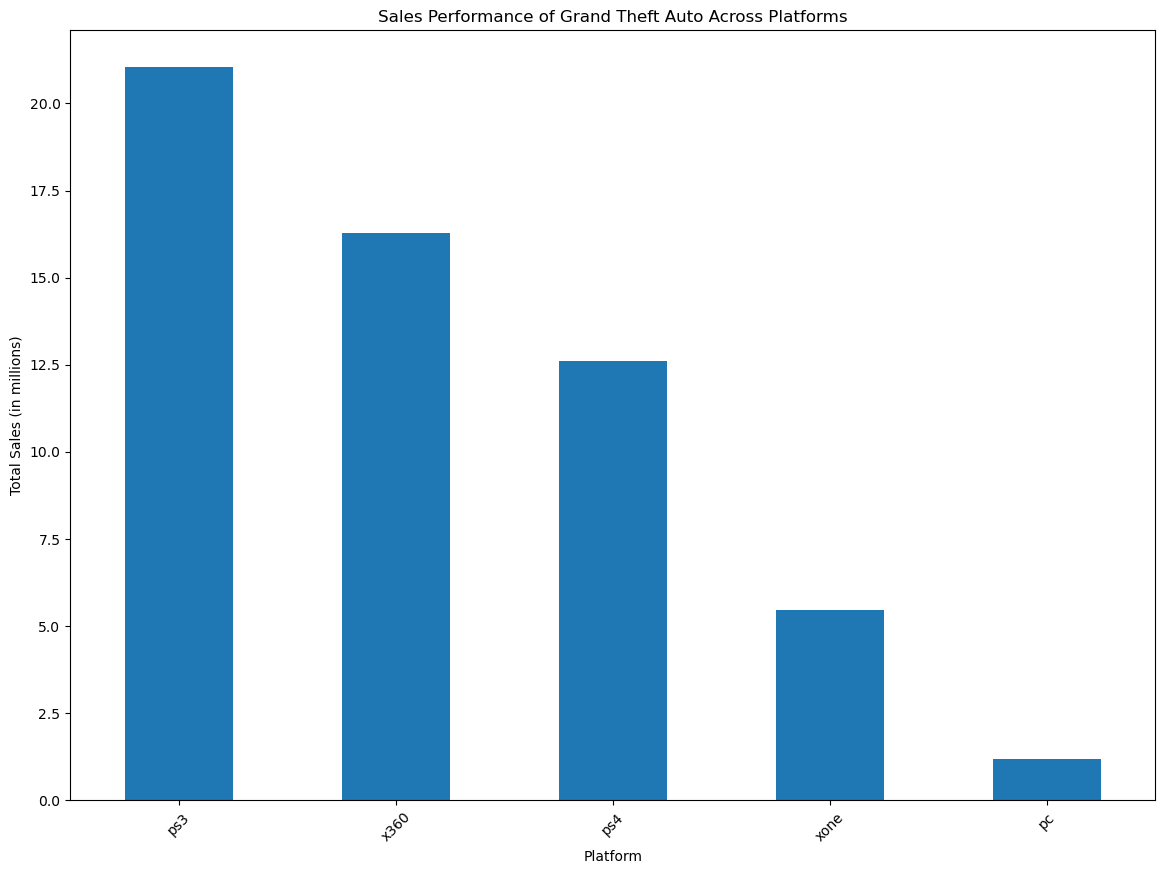

In [55]:
df_gtav.plot(x='platform',   #use a bar chart to compare sales performance of grand theft auto v among platforms
        y=['total_sales'],
        kind='bar',
        title='Sales Performance of Grand Theft Auto Across Platforms',
        legend=False,
        xlabel='Platform',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

PS3 and X360 have more total sales because the platforms have been around over 5 years longer than PS4 and Xone.  As customers begin to upgrade to PS4 and Xone, it is likely the sales of grand theft auto v will increase.

* **The Witcher 3: Wild Hunt: Sales Comparison by Platform**

In [56]:
selected_game = 'the witcher 3: wild hunt'  #pull platforms where the witcher 3: wild hunt is available
df_tw3 = df_relevant[df_relevant['name'] == selected_game]
df_tw3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
303,the witcher 3: wild hunt,ps4,2015,role-playing,1.02,2.13,0.23,0.59,92.0,9.2,m,3.97
1499,the witcher 3: wild hunt,xone,2015,role-playing,0.69,0.50,0.00,0.11,91.0,9.2,m,1.30
2851,the witcher 3: wild hunt,pc,2015,role-playing,0.21,0.46,0.00,0.05,93.0,9.3,m,0.72


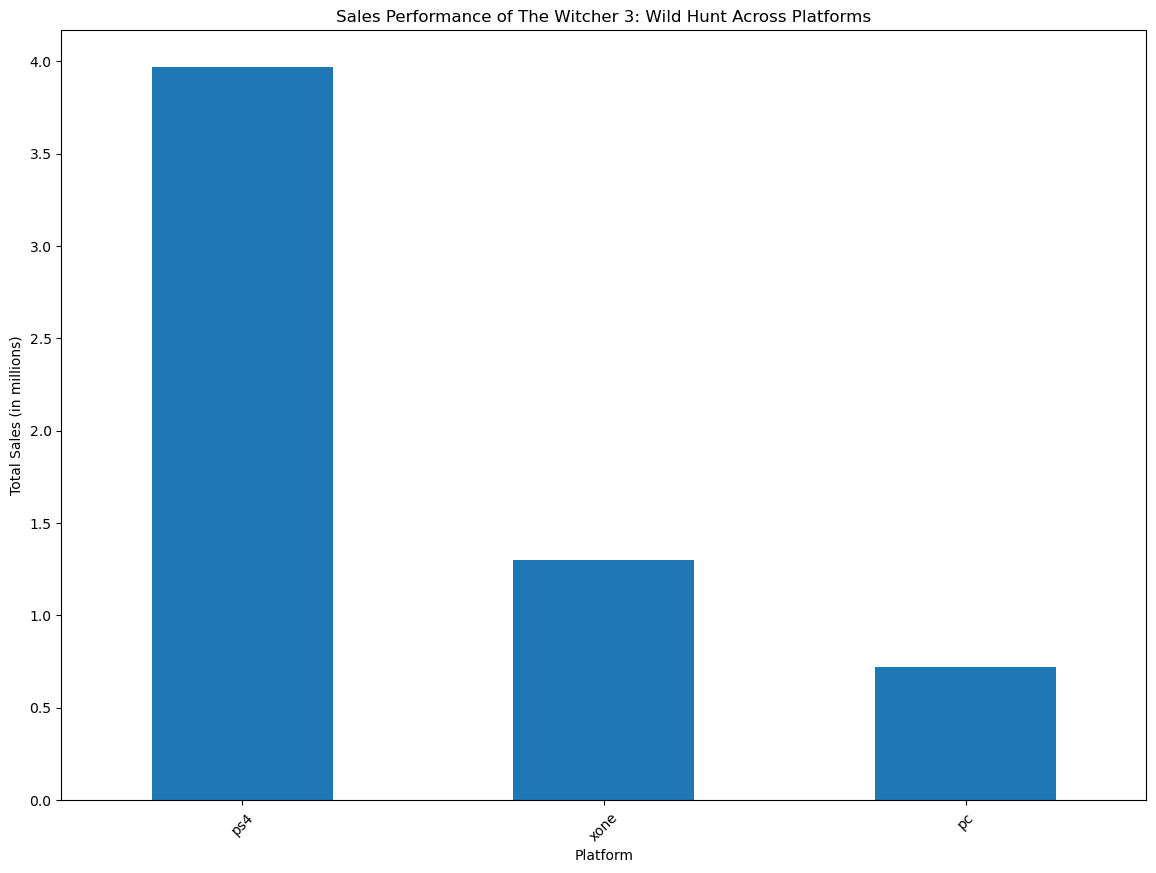

In [57]:
df_tw3.plot(x='platform',   #use a bar chart to compare the witcher 3: wild hunt sales performance among platforms
        y=['total_sales'],
        kind='bar',
        title='Sales Performance of The Witcher 3: Wild Hunt Across Platforms',
        legend=False,
        xlabel='Platform',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

The Witcher 3: Wild Hunt was released in 2015. PS4 and Xone were released in 2013. Since this game was only released for availability among new models, this could be incentive for cusotmers to upgrade to have access.  This also leads me to wonder if majority of the games available across PS and X are also released on PC which could help understand the staying power of pc.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [59]:
df_relevant[['genre', 'name', 'platform', 'total_sales']]


,genre,name,platform,total_sales
16,action,grand theft auto v,ps3,21.05
23,action,grand theft auto v,x360,16.27
31,shooter,call of duty: black ops 3,ps4,14.63
33,role-playing,pokemon x/pokemon y,3ds,14.60
34,shooter,call of duty: black ops ii,ps3,13.79
...,...,...,...,...
16703,adventure,strawberry nauts,psv,0.01
16707,misc,aiyoku no eustia,psv,0.01
16710,action,samurai warriors: sanada maru,ps3,0.01
16712,adventure,haitaka no psychedelica,psv,0.01


In [61]:
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().sort_values()  #add the sales by genre
genre_sales

genre
puzzle            4.69
strategy         13.34
adventure        28.50
simulation       34.56
fighting         44.37
racing           53.25
platform         60.19
misc             82.00
sports          179.92
role-playing    192.80
shooter         304.44
action          437.04
Name: total_sales, dtype: float64

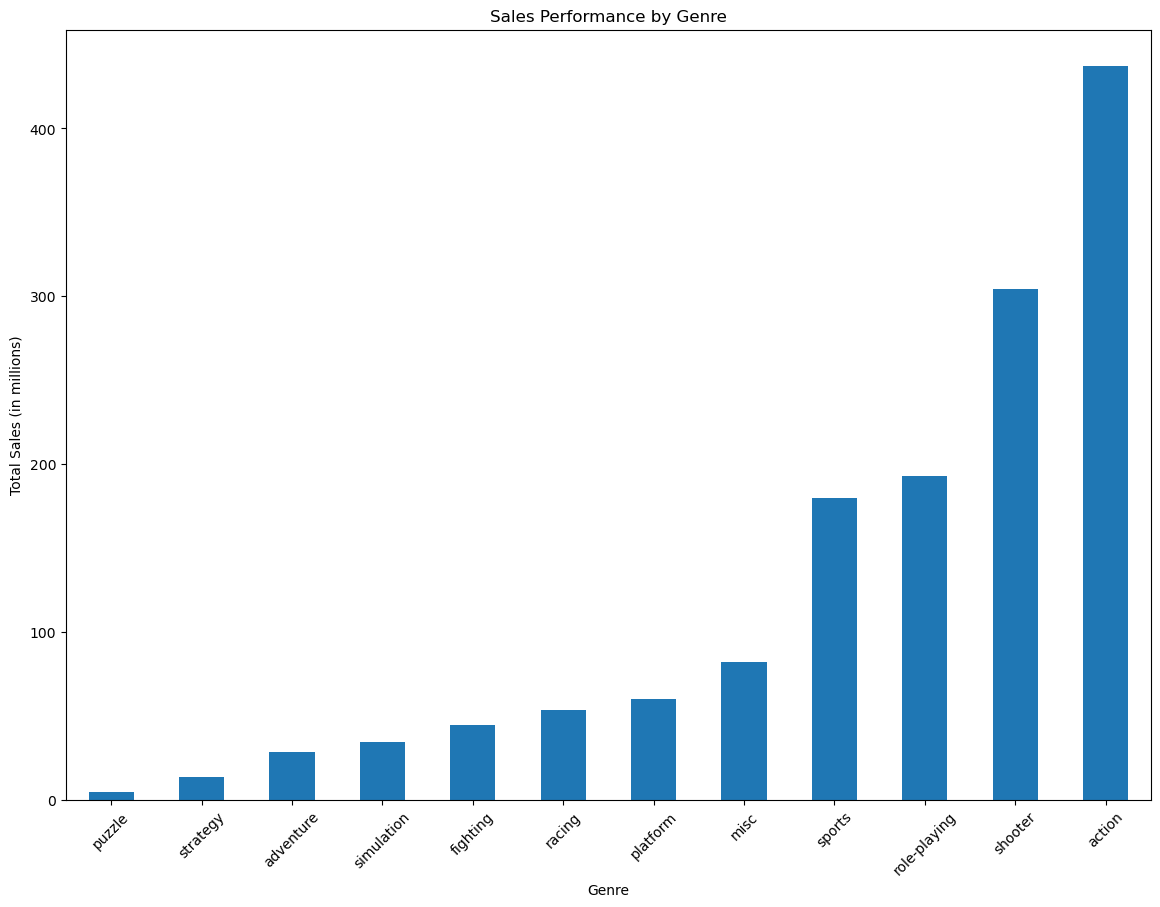

In [62]:
genre_sales.plot(x='genre',   #use a bar chart to compare sales performance by genre
        y='total_sales',
        kind='bar',
        title='Sales Performance by Genre',
        legend=False,
        xlabel='Genre',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

**The most profitable genres, from greatest to least, are action, shooter and role-playing.** These genres have broad appeal to many different types and levels of gamers. Sports has a huge cultural influence on people of all ages. These games also have a multiplayer and social aspect that is attractive. The least profitable genres are puzzle, strategy and adventure.  I think these are the lowest because there is no storytelling aspect and may appeal to small children or seniors who may not play games as often as teens and mature audiences.

**The high and low sales are likely highly affected by how often new versions of the games release below I show the same chart based on average sales.** The profitable genres are usually doing yearly releases while the least profitable genres do not. I predit that the top genres will still be in the top 85 percentile of popular genres.

__________

In [64]:
# Grouped by genre to calculate the total sales and number of games
genre_sales_avg_per_release = df_relevant.groupby('genre').agg(total_sales=('total_sales', 'sum'), game_count=('total_sales', 'count')).reset_index()

# Calculate average sales per genre
genre_sales_avg_per_release['average_sales'] = genre_sales_avg_per_release['total_sales'] / genre_sales_avg_per_release['game_count']

genre_sales_avg_per_release = genre_sales_avg_per_release.sort_values(by='average_sales')

genre_sales_avg_per_release

,genre,total_sales,game_count,average_sales
1,adventure,28.50,289,0.098616
11,strategy,13.34,71,0.187887
5,puzzle,4.69,21,0.223333
2,fighting,44.37,106,0.418585
0,action,437.04,983,0.444598
9,simulation,34.56,74,0.467027
3,misc,82.00,173,0.473988
6,racing,53.25,112,0.475446
7,role-playing,192.80,370,0.521081
10,sports,179.92,248,0.725484


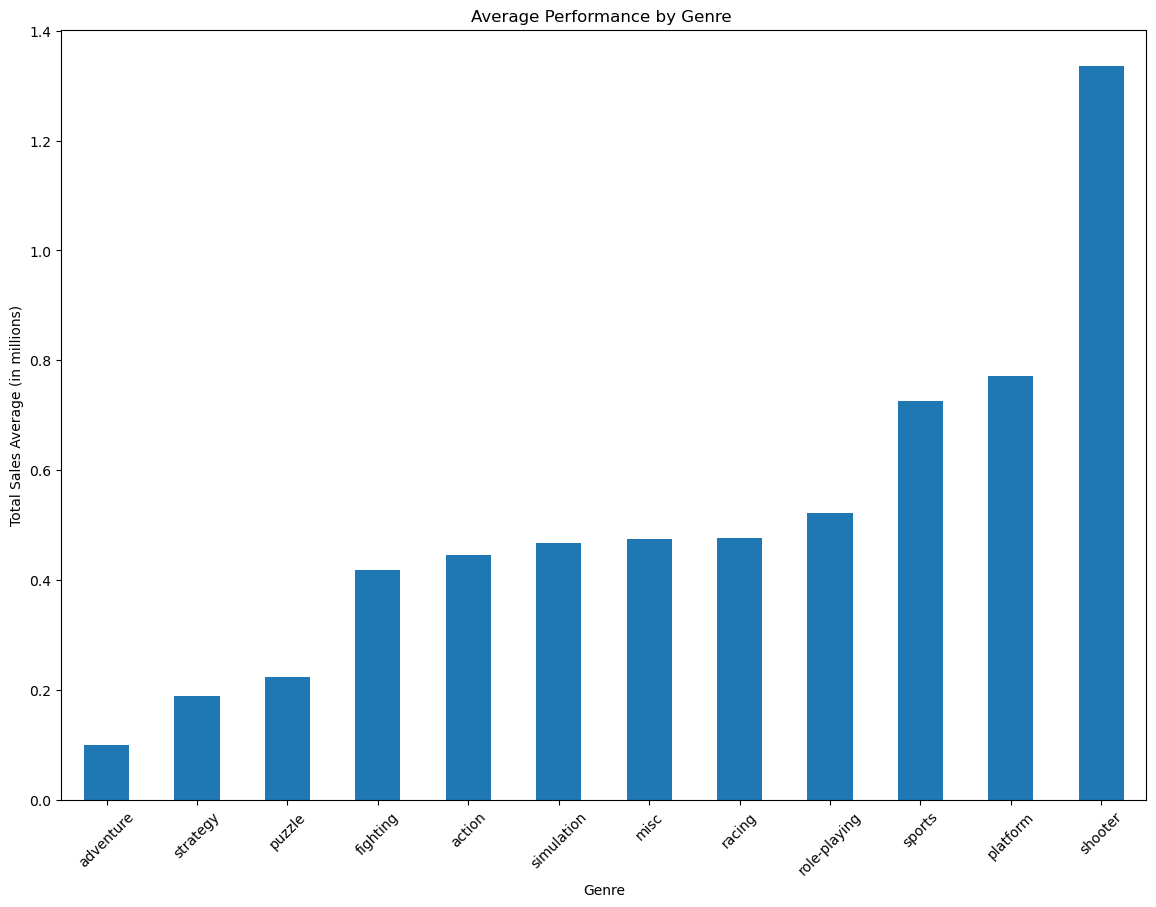

In [65]:
genre_sales_avg_per_release.plot(x='genre',   #use a bar chart to compare average performance by genre
        y='average_sales',
        kind='bar',
        title='Average Performance by Genre ',
        legend=False,
        xlabel='Genre',
        ylabel='Total Sales Average (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

Considering how many games each genre releases, average sales reflects a different story.  **On average, platform, shooter and racing are the top three genres.** Action dropped down to the median. Adventure, strategy and simulation remain in the lowest percentile of genre popularity.

## User Profile for each Region

I'm going to create a profile to analyze the top five platforms, the top five genres and how the ESRB rating affects sales by each region over the year. I will take the previously mentioned columns along with the designated region to form a new dataframe to analyze and plot a bar chart.

* **NORTH AMERICA- TOP 5 PLATFORMS**

In [66]:
na_5_top_platforms = df_relevant.groupby('platform')['na_sales'].sum().nlargest(5).reset_index() # Aggregate total sales by platform, get the top 5 and reset the index

na_5_top_platforms.columns = ['platform', 'na_sales']

na_5_top_platforms

,platform,na_sales
0,x360,139.16
1,ps4,108.62
2,ps3,103.10
3,xone,92.77
4,3ds,54.65


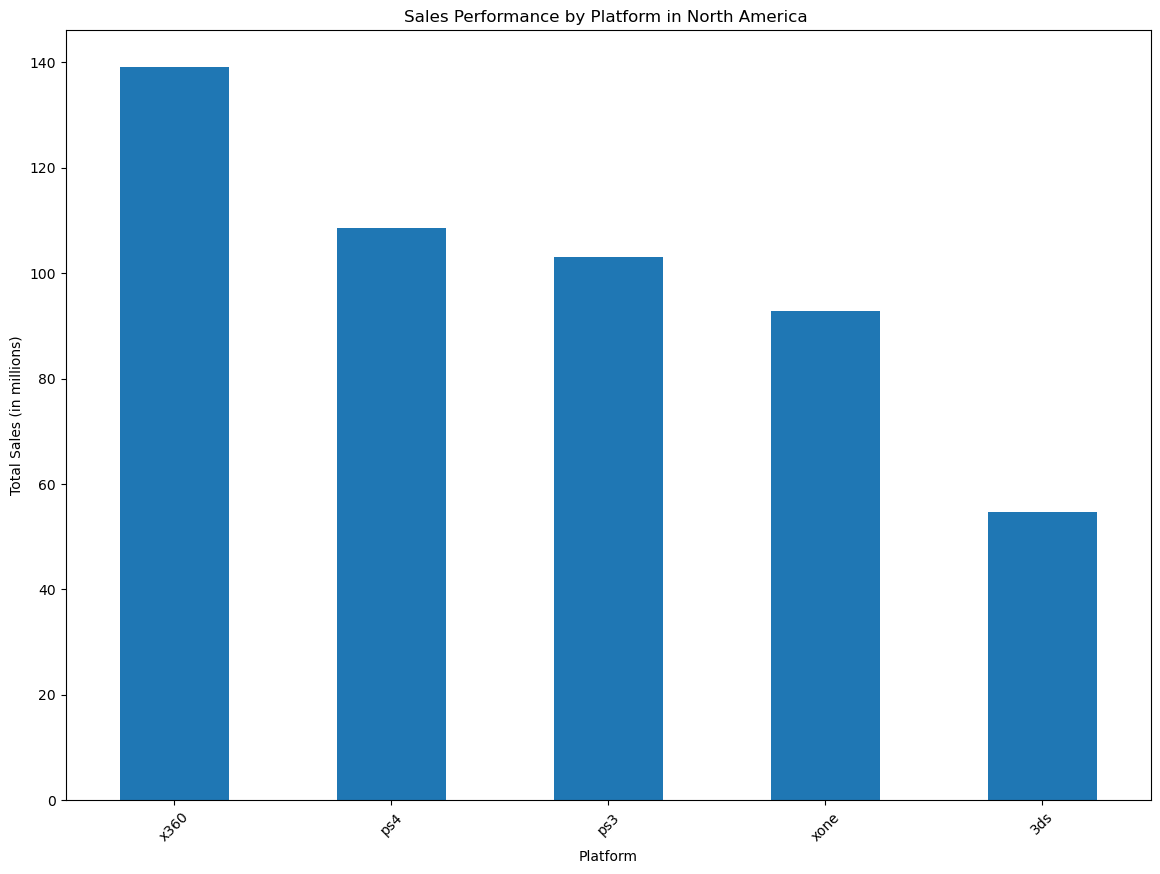

In [67]:
na_5_top_platforms.plot(x='platform',   #use a bar chart to show top 5 platforms in north america
        y='na_sales',
        kind='bar',
        title='Sales Performance by Platform in North America ',
        legend=False,
        xlabel='Platform',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **EUROPE- TOP 5 PLATFORMS**

In [68]:
eu_5_top_platforms = df_relevant.groupby('platform')['eu_sales'].sum().nlargest(5).reset_index()  # Aggregate total sales by platform, get the top 5 and reset the index

eu_5_top_platforms.columns = ['platform', 'eu_sales']

eu_5_top_platforms

,platform,eu_sales
0,ps4,141.09
1,ps3,106.25
2,x360,74.02
3,xone,51.43
4,3ds,41.64


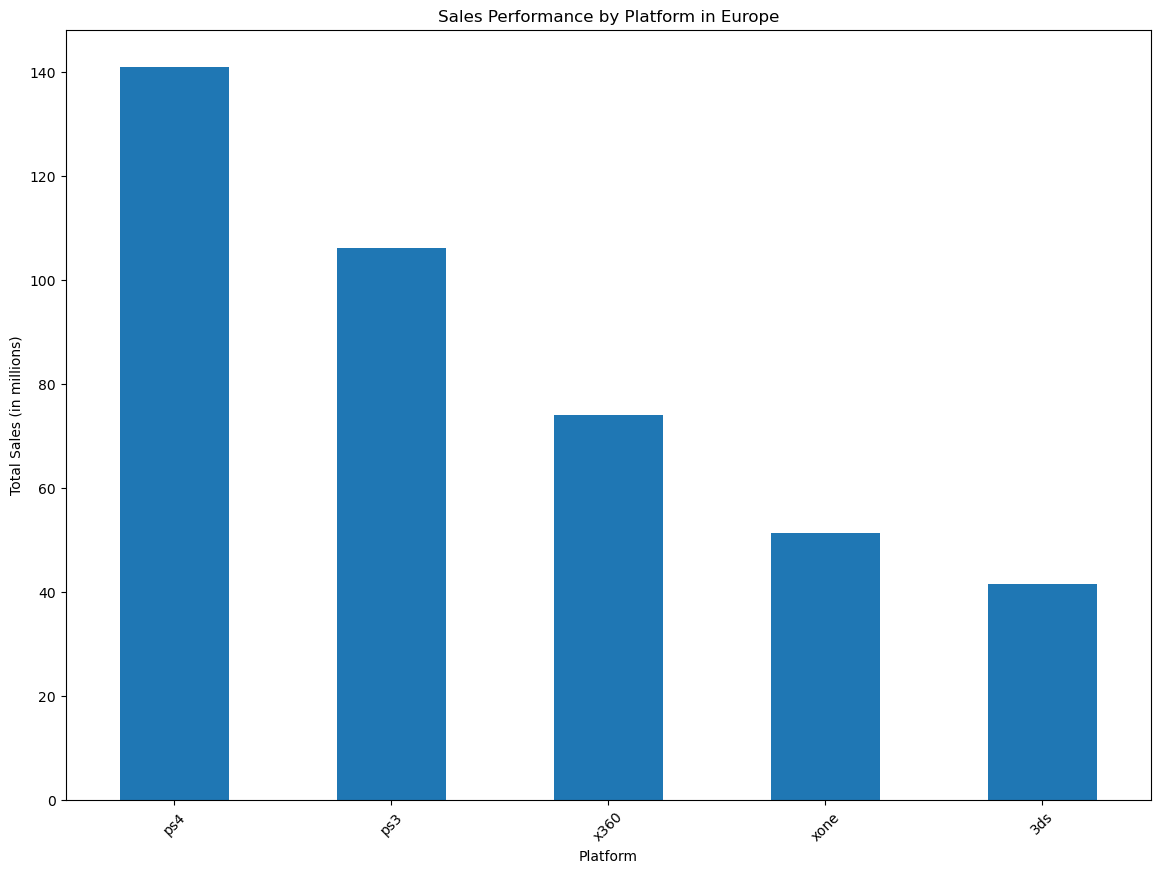

In [69]:
eu_5_top_platforms.plot(x='platform',   #use a bar chart to show top 5 platforms in europe
        y='eu_sales',
        kind='bar',
        title='Sales Performance by Platform in Europe',
        legend=False,
        xlabel='Platform',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **JAPAN- TOP 5 PLATFORMS**

In [70]:
jp_5_top_platforms = df_relevant.groupby('platform')['jp_sales'].sum().nlargest(5).reset_index() # Aggregate total sales by platform, get the top 5 and reset the index

jp_5_top_platforms.columns = ['platform', 'jp_sales']

jp_5_top_platforms

,platform,jp_sales
0,3ds,87.68
1,ps3,34.92
2,psv,20.93
3,ps4,15.96
4,wiiu,13.01


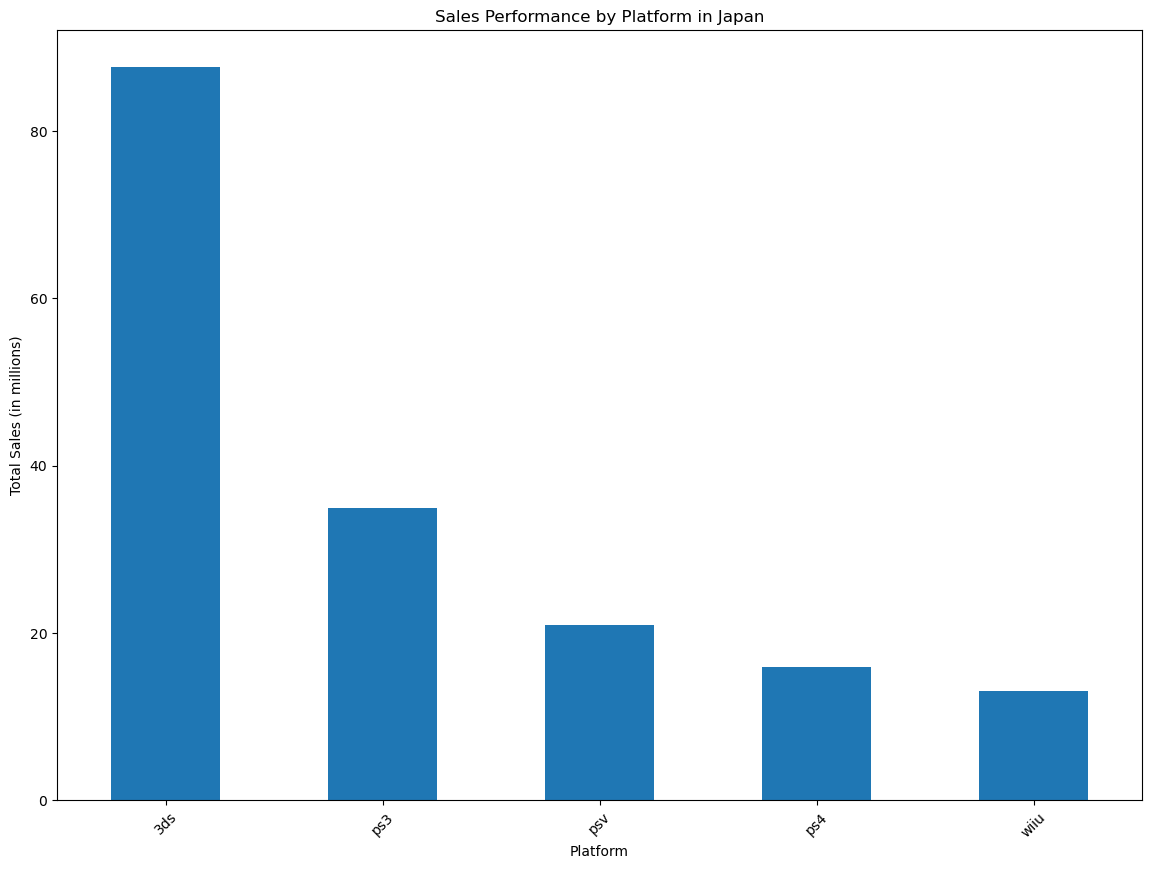

In [71]:
jp_5_top_platforms.plot(x='platform',   #use a bar chart to show top 5 platforms in japan
        y='jp_sales',
        kind='bar',
        title='Sales Performance by Platform in Japan',
        legend=False,
        xlabel='Platform',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **TOP 5 PLATFORMS FOR NA, EU & JP**

In [72]:
merged_df = pd.merge(na_5_top_platforms, eu_5_top_platforms, on='platform', how='outer')  # Merge na and eu top 5
merged_top_5_regionally = pd.merge(merged_df, jp_5_top_platforms, on='platform', how='outer')  # Merge the result with jp top 5

merged_top_5_regionally

,platform,na_sales,eu_sales,jp_sales
0,3ds,54.65,41.64,87.68
1,ps3,103.10,106.25,34.92
2,ps4,108.62,141.09,15.96
3,psv,NaN,NaN,20.93
4,wiiu,NaN,NaN,13.01
5,x360,139.16,74.02,NaN
6,xone,92.77,51.43,NaN


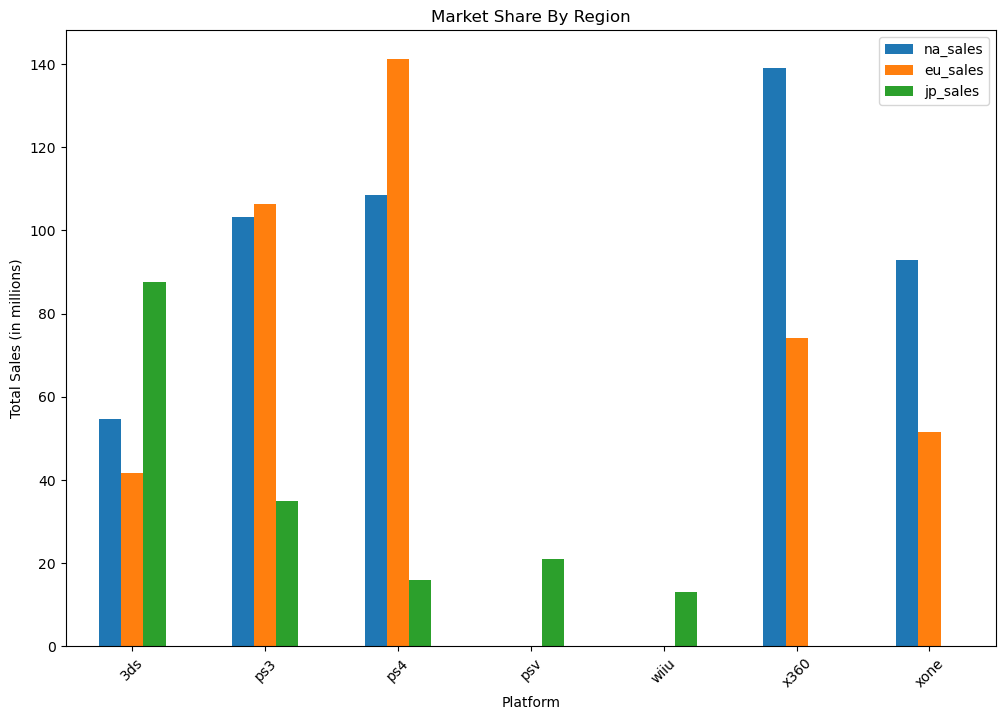

In [73]:
merged_top_5_regionally.plot(x='platform',   #bar plot the top 5 platform's sales by region
        y=['na_sales','eu_sales','jp_sales'],
        kind='bar',
        legend=True,
        title='Market Share By Region',
        xlabel='Platform',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(12, 8))

plt.legend(['na_sales','eu_sales','jp_sales'])
plt.show()

X360 is holding the largest market share in North America. PS4 is holding the largest market share in Europe. 3DS is holding the largest market share in Japan. **North America dominates the market share of sales globally.**

* **NORTH AMERICA- TOP 5 GENRES**

In [74]:
na_top_5_genres = df_relevant.groupby('genre')['na_sales'].sum().nlargest(5).reset_index() # Aggregate total sales by genre, get the top 5 and reset the index

na_top_5_genres

,genre,na_sales
0,action,176.39
1,shooter,144.64
2,sports,81.13
3,role-playing,64.00
4,misc,36.90


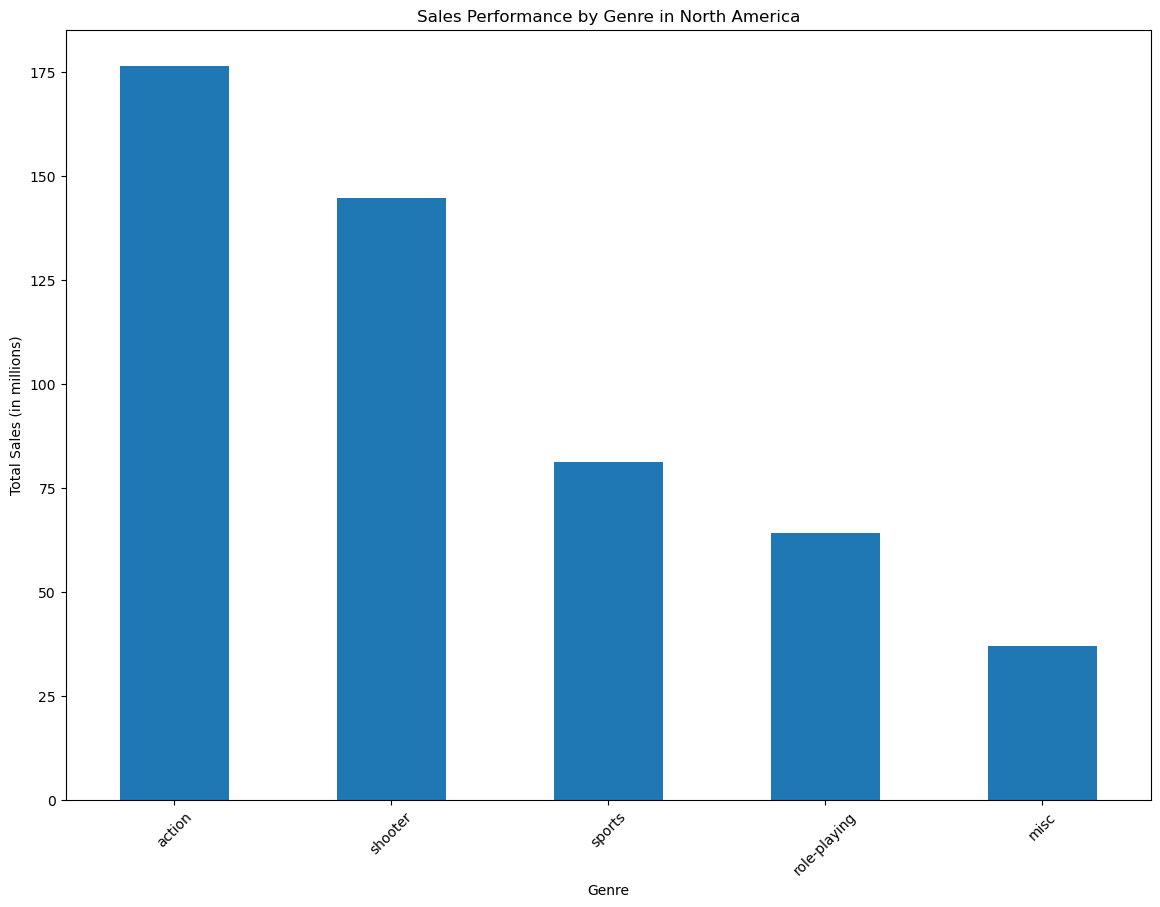

In [75]:
na_top_5_genres.plot(x='genre',   #use a bar chart to show top 5 genres in north america
        y='na_sales',
        kind='bar',
        title='Sales Performance by Genre in North America',
        legend=False,
        xlabel='Genre',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **EUROPE- TOP 5 GENRES**

In [76]:
eu_top_5_genres = df_relevant.groupby('genre')['eu_sales'].sum().nlargest(5).reset_index() # Aggregate total sales by genre, get the top 5 and reset the index

eu_top_5_genres

,genre,eu_sales
0,action,157.51
1,shooter,113.33
2,sports,68.68
3,role-playing,48.53
4,racing,27.19


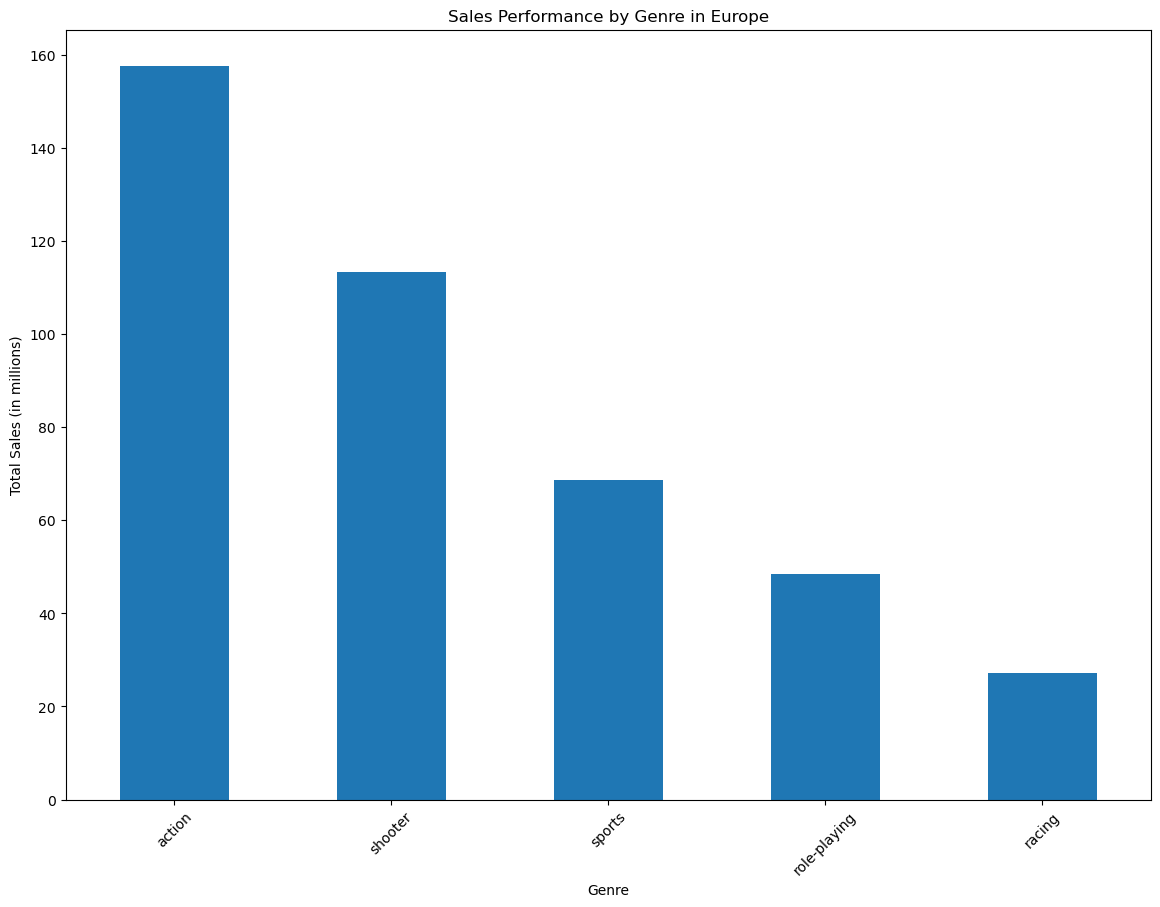

In [77]:
eu_top_5_genres.plot(x='genre',   #use a bar chart to show top 5 genres in europe
        y='eu_sales',
        kind='bar',
        title='Sales Performance by Genre in Europe',
        legend=False,
        xlabel='Genre',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **JAPAN- TOP 5 GENRES**

In [78]:
jp_top_5_genres = df_relevant.groupby('genre')['jp_sales'].sum().nlargest(5).reset_index() # Aggregate total sales by genre, get the top 5 and reset the index

jp_top_5_genres

,genre,jp_sales
0,role-playing,65.44
1,action,52.33
2,misc,12.86
3,simulation,10.35
4,fighting,9.41


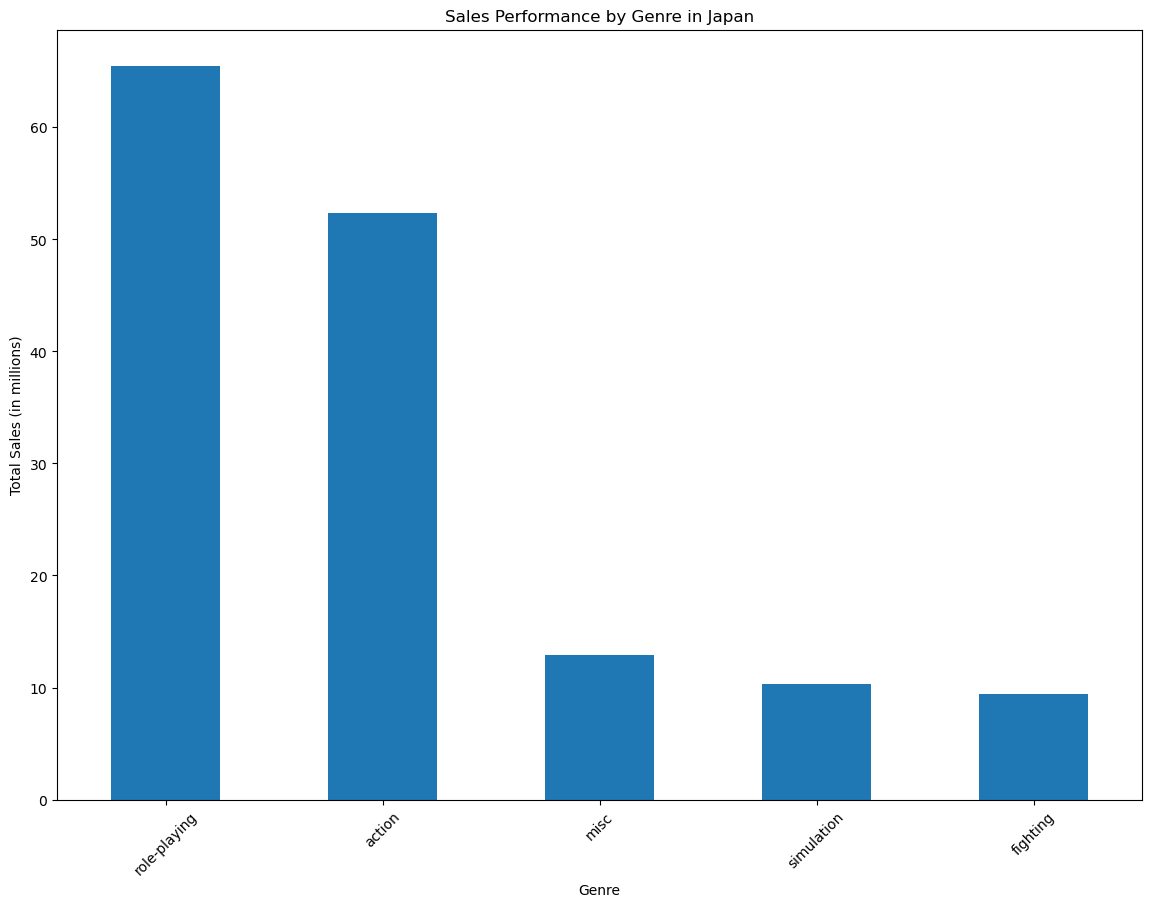

In [79]:
jp_top_5_genres.plot(x='genre',   #use a bar chart to show top 5 genres in japan
        y='jp_sales',
        kind='bar',
        title='Sales Performance by Genre in Japan',
        legend=False,
        xlabel='Genre',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **TOP 5 GENRES FOR NA, EU & JP**

In [80]:
merged_df = pd.merge(na_top_5_genres, eu_top_5_genres, on='genre', how='outer')  # Merge na and eu top 5
merged_top_genres_regionally = pd.merge(merged_df, jp_top_5_genres, on='genre', how='outer')  # Merge the result with jp top 5

merged_top_genres_regionally

,genre,na_sales,eu_sales,jp_sales
0,action,176.39,157.51,52.33
1,fighting,NaN,NaN,9.41
2,misc,36.90,NaN,12.86
3,racing,NaN,27.19,NaN
4,role-playing,64.00,48.53,65.44
5,shooter,144.64,113.33,NaN
6,simulation,NaN,NaN,10.35
7,sports,81.13,68.68,NaN


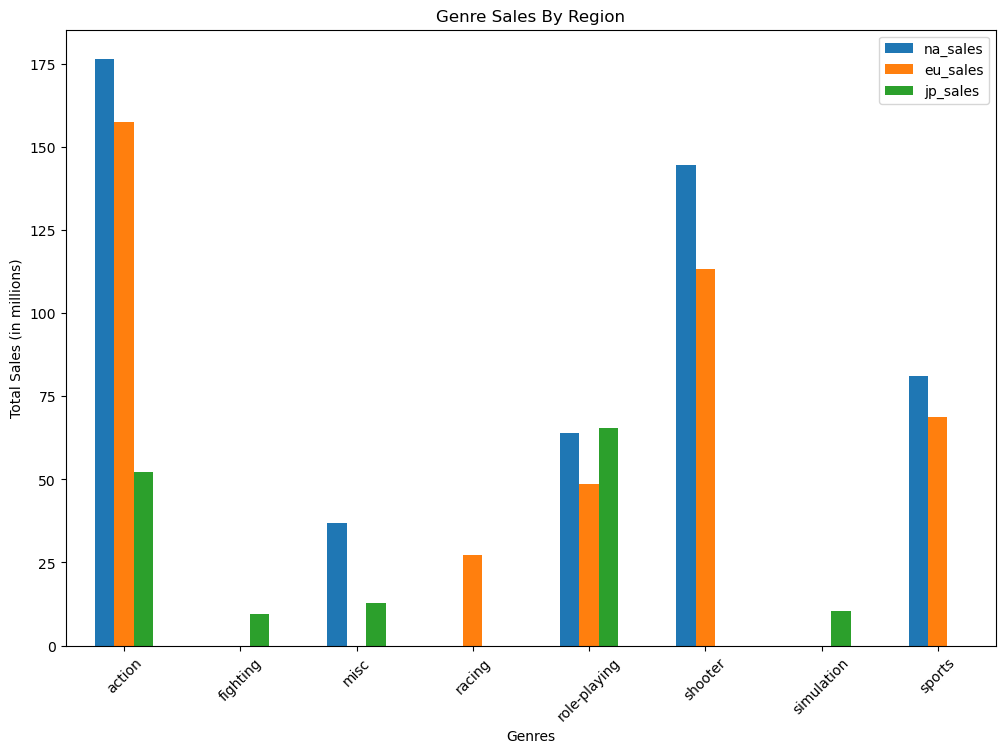

In [81]:
merged_top_genres_regionally.plot(x='genre',   #bar plot the top 5 genre's sales by region
        y=['na_sales','eu_sales','jp_sales'],
        kind='bar',
        legend=True,
        title='Genre Sales By Region',
        xlabel='Genres',
        ylabel='Total Sales (in millions)',
        rot=45,
        figsize=(12, 8))

plt.legend(['na_sales','eu_sales','jp_sales'])
plt.show()

North American sales overwhelmingly lead in genres such as action, shooter and sports. In contrast, Japan shows a distinct preference for role-playing games as its most popular genre. Europe aligns with North America in favoring action games, while also displaying a notable interest in shooter games.

* **NORTH AMERICA ESRB RATING EFFECTS**

In [82]:
na_region = df_relevant[['na_sales', 'genre', 'name', 'platform','year_of_release','rating']]  #create a NA profile
na_region = na_region[na_region['na_sales'] != 0.00]  #drop where sales are 0.00
na_region

,na_sales,genre,name,platform,year_of_release,rating
16,7.02,action,grand theft auto v,ps3,2013,m
23,9.66,action,grand theft auto v,x360,2013,m
31,6.03,shooter,call of duty: black ops 3,ps4,2015,NaN
33,5.28,role-playing,pokemon x/pokemon y,3ds,2013,NaN
34,4.99,shooter,call of duty: black ops ii,ps3,2012,m
...,...,...,...,...,...,...
16584,0.01,action,transformers: fall of cybertron,pc,2012,t
16613,0.01,fighting,dragon ball z for kinect,x360,2012,t
16618,0.01,adventure,xblaze: lost memories,psv,2015,m
16660,0.01,action,prison architect,xone,2016,NaN


In [83]:
na_region.shape #check the shape

(1607, 6)

In [84]:
na_region.isna().sum() #check for missing values

na_sales             0
genre                0
name                 0
platform             0
year_of_release      0
rating             352
dtype: int64

In [85]:
na_region['rating'].unique()

array(['m', nan, 'e', 'e10+', 't'], dtype=object)

In [86]:
na_region = na_region.dropna()  #drop rows with no ratings

In [87]:
na_region.isna().sum() #check that change applied

na_sales           0
genre              0
name               0
platform           0
year_of_release    0
rating             0
dtype: int64

In [88]:
na_region = na_region.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales') #aggregate the data to reflect sales totals per rating

In [89]:
na_region

,rating,na_sales
3,t,65.80
1,e10+,73.29
0,e,112.92
2,m,231.47


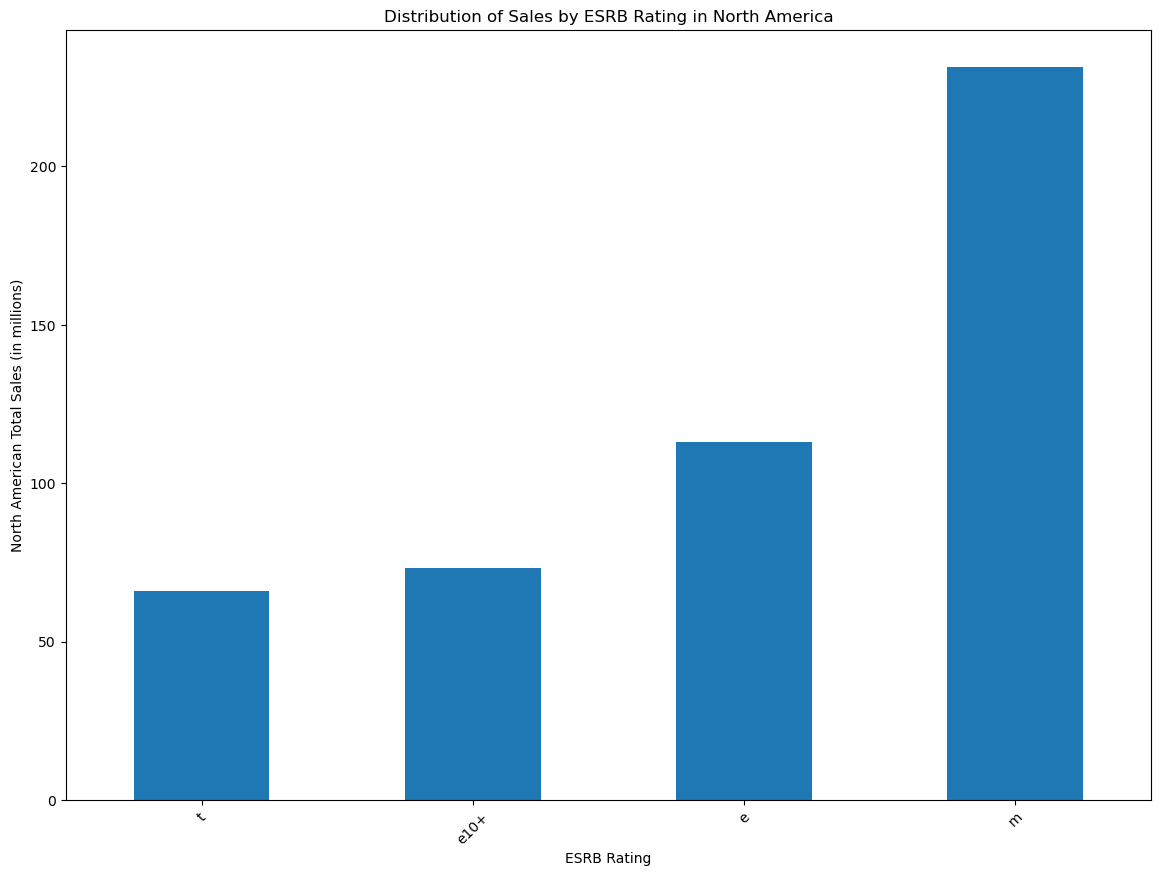

In [90]:
na_region.plot(x='rating',   #use a bar chart to show top 5 genres in north america
        y='na_sales',
        kind='bar',
        title='Distribution of Sales by ESRB Rating in North America',
        legend=False,
        xlabel='ESRB Rating',
        ylabel='North American Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **EUROPE ESRB RATING EFFECTS**

In [91]:
eu_region = df_relevant[['eu_sales', 'genre', 'name', 'platform','year_of_release','rating']] #create a EU profile
eu_region = eu_region[eu_region['eu_sales'] != 0.00]  #drop where sales are 0.00
eu_region

,eu_sales,genre,name,platform,year_of_release,rating
16,9.09,action,grand theft auto v,ps3,2013,m
23,5.14,action,grand theft auto v,x360,2013,m
31,5.86,shooter,call of duty: black ops 3,ps4,2015,NaN
33,4.19,role-playing,pokemon x/pokemon y,3ds,2013,NaN
34,5.73,shooter,call of duty: black ops ii,ps3,2012,m
...,...,...,...,...,...,...
16645,0.01,action,zombiu,xone,2016,NaN
16652,0.01,action,fast racing neo,wiiu,2016,e
16654,0.01,action,ben 10 omniverse 2,x360,2013,e10+
16674,0.01,action,tsukigime ranko's longest day,ps3,2014,NaN


In [92]:
eu_region.shape #check the shape

(1715, 6)

In [93]:
eu_region.isna().sum() #check for missing values

eu_sales             0
genre                0
name                 0
platform             0
year_of_release      0
rating             403
dtype: int64

In [94]:
eu_region = eu_region.dropna()  #drop rows with no ratings

In [95]:
eu_region.isna().sum() #check changes have applied

eu_sales           0
genre              0
name               0
platform           0
year_of_release    0
rating             0
dtype: int64

In [96]:
eu_region = eu_region.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales') #aggregate the data to reflect sales totals per rating

eu_region

,rating,eu_sales
1,e10+,52.48
3,t,52.82
0,e,110.94
2,m,193.94


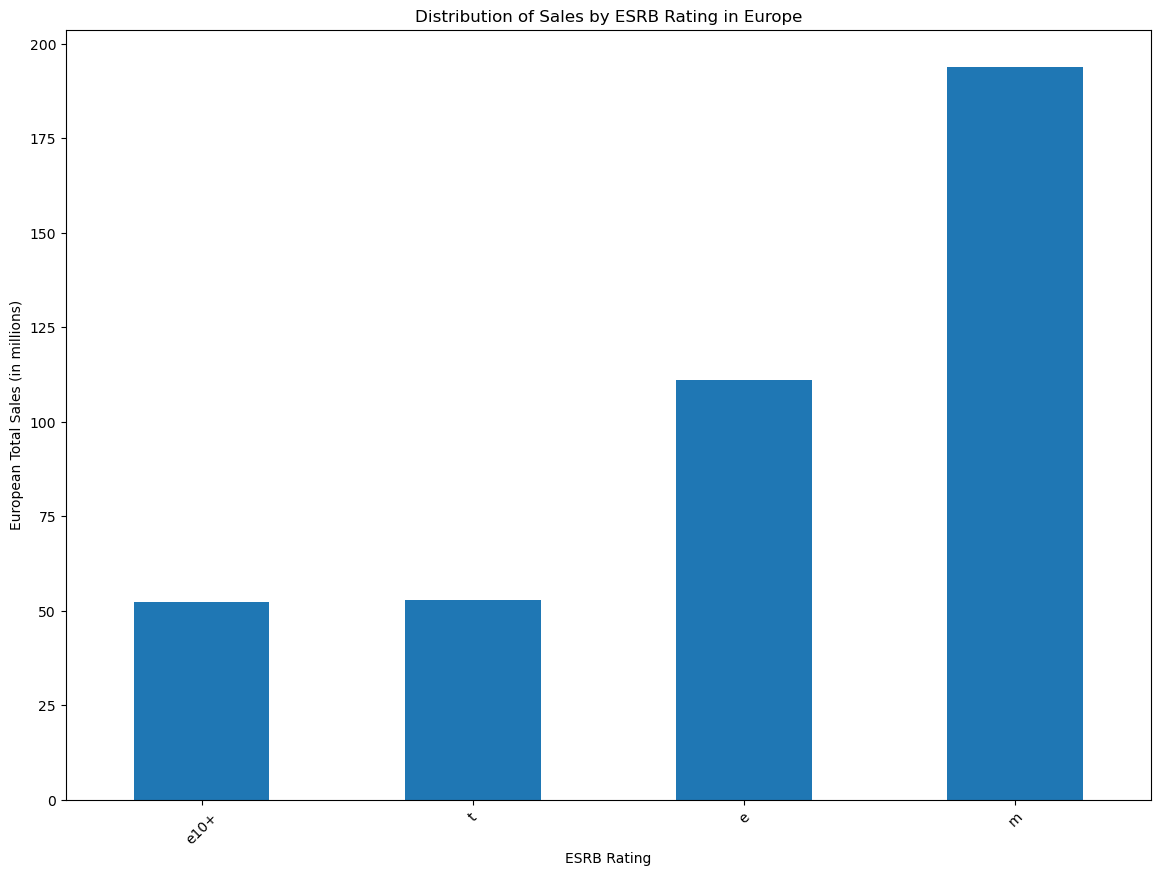

In [97]:
eu_region.plot(x='rating',   #use a bar chart to show top 5 genres in europe
        y='eu_sales',
        kind='bar',
        title='Distribution of Sales by ESRB Rating in Europe',
        legend=False,
        xlabel='ESRB Rating',
        ylabel='European Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

* **JAPAN ESRB RATING EFFECTS**

In [98]:
jp_region = df_relevant[['jp_sales', 'genre', 'name', 'platform','year_of_release','rating']] #create a JP profile
jp_region = jp_region[jp_region['jp_sales'] != 0.00] #drop where sales are 0.00
jp_region

,jp_sales,genre,name,platform,year_of_release,rating
16,0.98,action,grand theft auto v,ps3,2013,m
23,0.06,action,grand theft auto v,x360,2013,m
31,0.36,shooter,call of duty: black ops 3,ps4,2015,NaN
33,4.35,role-playing,pokemon x/pokemon y,3ds,2013,NaN
34,0.65,shooter,call of duty: black ops ii,ps3,2012,m
...,...,...,...,...,...,...
16703,0.01,adventure,strawberry nauts,psv,2016,NaN
16707,0.01,misc,aiyoku no eustia,psv,2014,NaN
16710,0.01,action,samurai warriors: sanada maru,ps3,2016,NaN
16712,0.01,adventure,haitaka no psychedelica,psv,2016,NaN


In [99]:
jp_region.shape #check the shape

(1554, 6)

In [100]:
jp_region.isna().sum() #check for missing values

jp_sales             0
genre                0
name                 0
platform             0
year_of_release      0
rating             942
dtype: int64

In [101]:
jp_region = jp_region.dropna()  #drop rows with no ratings

In [102]:
jp_region.isna().sum() #check changes applied

jp_sales           0
genre              0
name               0
platform           0
year_of_release    0
rating             0
dtype: int64

In [103]:
jp_region = jp_region.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales') #aggregate the data to reflect sales totals per rating

jp_region

,rating,jp_sales
1,e10+,8.06
2,m,21.20
3,t,25.55
0,e,28.09


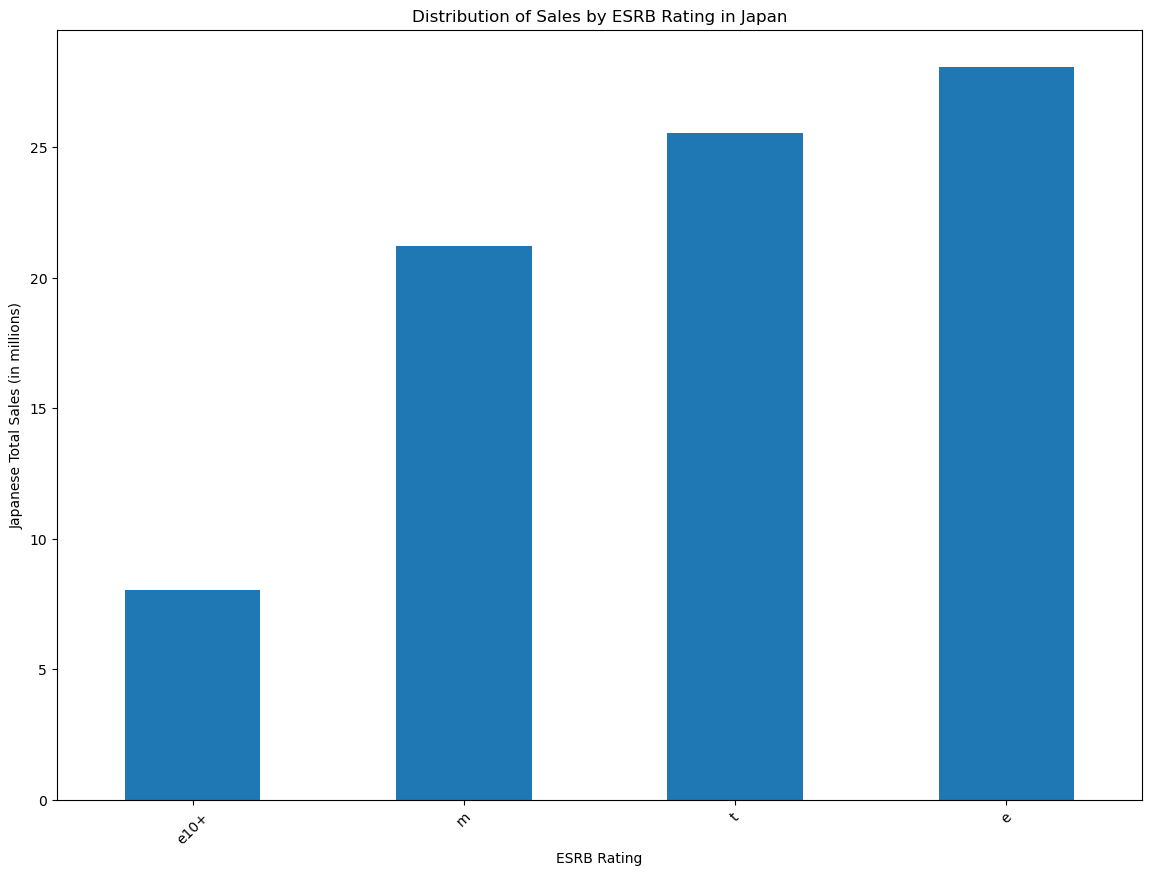

In [104]:
jp_region.plot(x='rating',   #use a bar chart to show top 5 genres in japan
        y='jp_sales',
        kind='bar',
        title='Distribution of Sales by ESRB Rating in Japan',
        legend=False,
        xlabel='ESRB Rating',
        ylabel='Japanese Total Sales (in millions)',
        rot=45,
        figsize=(14, 10))

plt.show()

It's pretty obvious that the ESRB Rating largely impacts sales across all three regions individually. 

**Common Ratings include;**
* EC (Early Childhood)- Suitable for children 3+
* E (Everyone)- Suitable for all ages.
* E10+ (Everyone 10 and Older)- Suitable for ages 10 and up.
* T (Teen)- Suitable for ages 13 and up.
* M (Mature 17+)- Suitable for ages 17 and up.
* RP (Rating Pending)

Games rated for E (Everyone) has the most sales across all regions. Rated M (Mature 17+) comes in second for North America and Europe however Rated T (Teen) is the runner up in Japan.

## Testing Statistical Hypotheses

* **PLATFORMS AVERAGE RATINGS**

Let's test the hypothesis that the average user ratings of the Xbox One and PC platforms are the same. This is important because we are trying to decipher if Xbox One will phase out while PC remains steady as it historically has done. In addition to that, it would be insightful to know if there is a significant difference between how users feel about the platforms. Since we are testing two samples against one another, we will be using the two-sample ttest hypothesis to test our null hypothesis with an alpha value of .01.

**Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same**

**Alternative hypothesis: Average user ratings of the Xbox One and PC platforms differs.**

In [105]:
#create a new dataframe of user_scores for xone, reset the index, drop the old index, change the column name and drop missing values
df_xone_user = df_relevant[df_relevant['platform'] == 'xone'][['user_score']].reset_index(drop=True).rename(columns={'user_score': 'xone_user_score'}).dropna()
df_xone_user = df_xone_user[df_xone_user['xone_user_score'] != 'tbd'] #drop rows with tbd
df_xone_user.info()  #check dtype

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 235
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   xone_user_score  182 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [106]:
df_xone_user = df_xone_user.astype(float) #change dtype to float

In [107]:
df_xone_user.std() #calculate standard deviation

xone_user_score    1.380941
dtype: float64

In [108]:
#create a new dataframe of user_scores for xone, reset the index, drop the old index, change the column name and drop missing values
df_pc_user = df_relevant[df_relevant['platform'] == 'pc'][['user_score']].reset_index(drop=True).rename(columns={'user_score': 'pc_user_score'}).dropna() 
df_pc_user = df_pc_user[df_pc_user['pc_user_score'] != 'tbd'] #drop rows with tbd
df_pc_user.info()  #check dtype

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 244
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pc_user_score  206 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


* We have uneven sample sizes which should be okay as long as the variance is roughly equal. So let's check the variances. If they are unequal we will proceed with the Welch's t-test.

In [109]:
df_pc_user = df_pc_user.astype(float)

In [110]:
df_pc_user.std() #calculate standard deviation

pc_user_score    1.664465
dtype: float64

In [111]:
variance_xone = df_xone_user.var()
variance_pc = df_pc_user.var()

print(f'Variance of sample 1: {variance_xone}')
print(f'Variance of sample 2: {variance_pc}')

Variance of sample 1: xone_user_score    1.906997
dtype: float64
Variance of sample 2: pc_user_score    2.770444
dtype: float64


In [112]:
df_xone_user_list = np.random.normal(df_xone_user['xone_user_score'].tolist()) #example data for two samples
df_pc_user_list = np.random.normal(df_pc_user['pc_user_score'].tolist())

In [113]:
t_stat, p_value = st.ttest_ind(df_xone_user_list, df_pc_user_list, equal_var=False)  # Perform Welch's t-test (unequal variances)

print(f'T-statistic: {t_stat}')  ## Display the results
print(f'P-value: {p_value}')

T-statistic: 0.5925450012341067
P-value: 0.55383403375311


In [114]:
alpha = 0.01 #select the alpha and interpret the results

if p_value < alpha:  
    print('Reject the null hypothesis: the means are significantly different.')
else:
    print('Fail to reject the null hypothesis: the means are not significantly different.')

Fail to reject the null hypothesis: the means are not significantly different.


In [115]:
alpha = 0.05 #select the alpha and interpret the results

if p_value < alpha:  
    print('Reject the null hypothesis: the means are significantly different.')
else:
    print('Fail to reject the null hypothesis: the means are not significantly different.')

Fail to reject the null hypothesis: the means are not significantly different.


I chose a significance level of .01 to take a more strigent approach to deciding if Xone and PC have equal average ratings. I also plugged in an alpha of 0.05 and the result did not change. The average ratings of Xone and PC are relatively the similar. In which it could be stated that users feel the same about the platforms.

* **GENRE AVERAGE RATINGS**

Let's test the hypothesis that the average user ratings of the Action and Sports platforms are the equal. We want to know if there is a significant difference in how users feel about the two most popular genres. Since we are testing two samples against one another, we will be using the two-sample ttest hypothesis to test our null hypothesis with an alpha value of .01.

**Null Hypothesis: Average user ratings for the Action and Sports genres are equal.**

**Alternative Hypothesis: Average user ratings for the Action and Sports genres are different.**

In [116]:
#create a new dataframe of user_scores for the action genre, reset the index, drop the old index, change the column name and drop missing values
df_action_genre = df_relevant[df_relevant['genre'] == 'action'][['user_score']].reset_index(drop=True).rename(columns={'user_score': 'action_user_score'}).dropna()
df_action_genre = df_action_genre[df_action_genre['action_user_score'] != 'tbd'] #drop rows with tbd
df_action_genre.info()  #check dtype

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 0 to 980
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   action_user_score  523 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [117]:
df_action_genre = df_action_genre.astype(float) #change dtype to float

In [118]:
df_action_genre.std() #calculate standard deviation

action_user_score    1.37444
dtype: float64

In [119]:
#create a new dataframe of user_scores for the sports genre, reset the index, drop the old index, change the column name and drop missing values
df_sports_genre = df_relevant[df_relevant['genre'] == 'sports'][['user_score']].reset_index(drop=True).rename(columns={'user_score': 'sports_user_score'}).dropna() 
df_sports_genre = df_sports_genre[df_sports_genre['sports_user_score'] != 'tbd'] #drop rows with tbd
df_sports_genre.info()  #check dtype

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 247
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sports_user_score  194 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [120]:
df_sports_genre = df_sports_genre.astype(float)

In [121]:
df_action_genre.std() #calculate standard deviation

action_user_score    1.37444
dtype: float64

* We have uneven sample sizes which should be okay as long as the variance is roughly equal. So let's check the variances. If they are unequal we will proceed with the Welch's t-test.

In [122]:
variance_action = df_action_genre.var()
variance_sports = df_sports_genre .var()

print(f'Variance of sample 1: {variance_action}')
print(f'Variance of sample 2: {variance_sports}')

Variance of sample 1: action_user_score    1.889084
dtype: float64
Variance of sample 2: sports_user_score    3.038543
dtype: float64


In [123]:
df_action_genre_list = np.random.normal(df_action_genre['action_user_score'].tolist()) #example data for two samples
df_sports_genre_list = np.random.normal(df_sports_genre['sports_user_score'].tolist())

In [124]:
t_stat, p_value = st.ttest_ind(df_action_genre_list, df_sports_genre_list, equal_var=False)  # Perform Welch's t-test (unequal variances)

print(f'T-statistic: {t_stat}')  # Display the results
print(f'P-value: {p_value}')

T-statistic: 7.458215303952467
P-value: 9.833647305771008e-13


In [125]:
alpha = 0.01 #select the alpha and interpret the results

if p_value < alpha:  
    print('Reject the null hypothesis: the means are significantly different.')
else:
    print('Fail to reject the null hypothesis: the means are not significantly different.')

Reject the null hypothesis: the means are significantly different.


In [126]:
alpha = 0.05 #select the alpha and interpret the results

if p_value < alpha:  
    print('Reject the null hypothesis: the means are significantly different.')
else:
    print('Fail to reject the null hypothesis: the means are not significantly different.')

Reject the null hypothesis: the means are significantly different.


I chose a significance level of .01 to reduce room for error. I also plugged in an alpha of 0.05 and the result did not change. The average ratings of Action and Sports genres are significantly different which means users don't feel the same or have the same experience with the two genres.

__________
# CONCLUSION: Video Game Marketing Considerations for 2017

Our mission was to analyze the historical data to make predictions about which game, platform and genre will be the most profitable in Ice's global marketplace online.  Let's take a look at this categorically for easier understanding. 

Our goal was to explore historical video game sales data to uncover which game genres, platforms, and regions are most likely to drive profitability in Ice’s global online marketplace. By breaking down the data into categories, we were able to reveal meaningful trends in consumer behavior and industry shifts.

In terms of platforms, we observed a clear lifecycle pattern. Consoles like the PS3, Xbox 360, and Wii enjoyed about a decade of strong performance before giving way to newer systems like the PS4 and Xbox One, which were still going strong in 2016. Meanwhile, PCs remained a stable, profitable option across the board.

When it comes to genre popularity, Action, Sports, and Shooter games consistently topped global sales, likely because of their broad appeal and social or multiplayer features. On the other hand, genres like Puzzle, Strategy, and Fighting didn’t perform as well, potentially due to their limited replay value or lack of immersive storytelling.

We also noticed strong regional preferences. North America dominated global sales and showed a clear preference for Action, Shooter, and Sports games, with Xbox 360 leading the market—though that could shift as users upgrade to newer platforms. Europe followed a similar trend but also had a soft spot for Racing games, while Japan stood out with a strong preference for Role-Playing Games and handheld consoles like the Nintendo DS.

Reviews played a role in performance too. High critic scores, particularly those above 80, had a strong positive effect on sales, as seen with blockbuster titles like Grand Theft Auto V and The Witcher 3. User scores had a weaker influence, suggesting that critic opinions are more predictive of success in this market.

Lastly, ESRB ratings offered insight into audience reach. Games rated E for Everyone were the most commercially successful across all regions, appealing to a broad demographic. Mature-rated games performed well in North America and Europe, while Teen-rated games were more popular in Japan.


__________

  
## Suggestions

**Personalized Marketing with Data Analytics**

By analyzing past sales and user reviews, we can offer personalized game recommendations tailored to each customer’s interests, purchase history, and console preferences. For instance, someone who enjoyed The Witcher 3 might be excited to try Elden Ring based on similar themes and gameplay mechanics.

Marketing efforts can also be fine-tuned by region. In North America, promotions should spotlight genres like Action, Shooter, and Sports. In Europe, campaigns can focus on Action and Racing titles, while in Japan, RPGs and handheld games tend to resonate best with players.

**Boost Visibility Through Influencer Collaborations and Social Media**

To expand reach and build brand awareness, partnering with well-known gaming influencers and streamers is a powerful strategy. Showcasing game launches or special discounts through popular YouTube and Twitch personalities—especially with gameplay from hits like Call of Duty, Grand Theft Auto, or FIFA—can drive engagement and sales for Ice’s online store.
    
__________


In conclusion, PS4 and X360 are primed for continued success however PS4 is leading and I believe will continue to lead as consumers from older platforms convert. Grand Theft Auto, Call of Duty and FIFA are huge franchise successes that release yearly or bi-yearly.  If new releases are expected to happen in 2017 then that will be a huge opportunity to maximize on. North America and Europe are the top selling regions so focusing influencer collaborations here would be a good opportunity for additional reach. Lastly, put a strong marketing push behind games rated E or M.